# Bike Sharing Assignment

### Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

C:\Users\Swarnali Sen\AppData\Local\Temp\ipykernel_7976\1560194229.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Importing data

In [2]:
records = pd.read_csv('day.csv')

## Data Visualization

In [3]:
records.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

### Setting the 'instant' column as index - as it represents the no of records

In [4]:
records = records.set_index('instant')

In [5]:
records.describe()

season          yr        mnth     holiday     weekday  workingday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     2.498630    0.500000    6.526027    0.028767    2.997260    0.683562   
std      1.110184    0.500343    3.450215    0.167266    2.006161    0.465405   
min      1.000000    0.000000    1.000000    0.000000    0.000000    0.000000   
25%      2.000000    0.000000    4.000000    0.000000    1.000000    0.000000   
50%      3.000000    0.500000    7.000000    0.000000    3.000000    1.000000   
75%      3.000000    1.000000   10.000000    0.000000    5.000000    1.000000   
max      4.000000    1.000000   12.000000    1.000000    6.000000    1.000000   

       weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.544807    7.506729    8.150308   14.237589    5.195841   
min      1.000000    2.424346    3.953480    0.000000    1.500244   
25%      1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000   20.465826   24.368225   62.625000   12.125325   
75%      2.000000   26.880615   30.445775   72.989575   15.625589   
max      3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

In [6]:
records.info()

<class 'pandas.core.frame.DataFrame'>
Index: 730 entries, 1 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 91.2+ KB


In [7]:
records.nunique()

dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

### Dropping 'casual' & 'registered' column as they won't be used for model

In [8]:
records.drop(['casual','registered'],axis=1,inplace=True)

### Dropping 'dteday' column 

In [9]:
records.drop('dteday',axis=1,inplace=True)

### Added method to add Dummy Variables for a column

In [10]:
def add_dummy_vars(df,col,dummy_col_to_drop=None,categorical_map=None):
    if categorical_map:
        df[col]=df[col].map(categorical_map)
    dummies = pd.get_dummies(df[col]).map(lambda x: 1 if x else 0)
    if dummy_col_to_drop and dummy_col_to_drop in dummies.columns:
        dummies.drop(dummy_col_to_drop,axis=1,inplace=True)
    df=df.join(dummies)
    df.drop(col,axis=1,inplace=True)
    return df

### Creating Dummy Variables for 'weathersit'

In [11]:
records['weathersit'].value_counts()

weathersit
1    463
2    246
3     21
Name: count, dtype: int64

In [12]:
weather_map = {
    1: "clear",
    2: "misty",
    3: "light rain/snow",
    4: "heavy rain/snow"
}
records = add_dummy_vars(records,'weathersit','heavy rain/snow',weather_map)

### Creating Dummy Variables for 'season'

In [13]:
records['season'].value_counts()

season
3    188
2    184
1    180
4    178
Name: count, dtype: int64

In [14]:
season_map = {
    1: "spring",
    2: "summer",
    3: "fall",
    4: "winter"
}
records = add_dummy_vars(records,'season','winter',season_map)

### Creating Dummy Variables for 'weekday'

In [15]:
days_map = {
    6: "mon",
    0: "tues",
    1: "wed",
    2: "thurs",
    3: "fri",
    4: "satur",
    5: "sun"
}
records = add_dummy_vars(records,'weekday','sun',days_map)

### Creating Dummy Variables for 'mnth'

In [16]:
months_map = {
    1: "jan",
    2: "feb",
    3: "mar",
    4: "apr",
    5: "may",
    6: "jun",
    7: "july",
    8: "aug",
    9: "sep",
    10: "oct",
    11: "nov",
    12: "dec"
}
records = add_dummy_vars(records,'mnth','dec',months_map)

In [17]:
records.nunique()

yr                   2
holiday              2
workingday           2
temp               498
atemp              689
hum                594
windspeed          649
cnt                695
clear                2
light rain/snow      2
misty                2
fall                 2
spring               2
summer               2
fri                  2
mon                  2
satur                2
thurs                2
tues                 2
wed                  2
apr                  2
aug                  2
feb                  2
jan                  2
july                 2
jun                  2
mar                  2
may                  2
nov                  2
oct                  2
sep                  2
dtype: int64

### Adding method for seggregating categorical and numerical variables

In [18]:
from pandas.api.types import is_numeric_dtype
def segregate_variables(df):
    cat_vars = []
    num_vars = []
    for col in df.columns:
        if df[col].nunique() <= 10:
            cat_vars.append(col)
        elif is_numeric_dtype(df[col]):
            num_vars.append(col)
    return cat_vars,num_vars

### Seggregating variables

In [19]:
cat_variables , num_variables = segregate_variables(records)

### Splitting the training and testing data with 70:30 ratio

In [20]:
records_train, records_test = train_test_split(records, train_size = 0.7, test_size = 0.3, random_state = 100)

### Creating MinMaxScaler instance

In [21]:
scaler = MinMaxScaler()

### Fitting and Transforming the numerical variables of training data with MinMaxScaler

In [22]:
records_train[num_variables] = scaler.fit_transform(records_train[num_variables])

In [23]:
records_train.head()

yr  holiday  workingday      temp     atemp       hum  windspeed  \
instant                                                                     
654       1        0           1  0.509887  0.501133  0.575354   0.300794   
577       1        0           1  0.815169  0.766351  0.725633   0.264686   
427       1        0           0  0.442393  0.438975  0.640189   0.255342   
729       1        0           0  0.245101  0.200348  0.498067   0.663106   
483       1        0           0  0.395666  0.391735  0.504508   0.188475   

              cnt  clear  light rain/snow  ...  aug  feb  jan  july  jun  mar  \
instant                                    ...                                  
654      0.864243      1                0  ...    0    0    0     0    0    0   
577      0.827658      1                0  ...    0    0    0     1    0    0   
427      0.465255      0                0  ...    0    0    0     0    0    1   
729      0.204096      1                0  ...    0    0    0     0    0    0   
483      0.482973      0                0  ...    0    0    0     0    0    0   

         may  nov  oct  sep  
instant                      
654        0    0    1    0  
577        0    0    0    0  
427        0    0    0    0  
729        0    0    0    0  
483        0    0    0    0  

[5 rows x 31 columns]

In [24]:
records_train.describe()

yr     holiday  workingday        temp       atemp         hum  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.507843    0.025490    0.676471    0.537262    0.512989    0.650369   
std      0.500429    0.157763    0.468282    0.225844    0.212385    0.145882   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.339853    0.332086    0.538643   
50%      1.000000    0.000000    1.000000    0.540519    0.526811    0.653714   
75%      1.000000    0.000000    1.000000    0.735215    0.688457    0.754830   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        windspeed         cnt       clear  light rain/snow  ...         aug  \
count  510.000000  510.000000  510.000000       510.000000  ...  510.000000   
mean     0.320768    0.513620    0.627451         0.029412  ...    0.096078   
std      0.169797    0.224593    0.483958         0.169124  ...    0.294988   
min      0.000000    0.000000    0.000000         0.000000  ...    0.000000   
25%      0.199179    0.356420    0.000000         0.000000  ...    0.000000   
50%      0.296763    0.518638    1.000000         0.000000  ...    0.000000   
75%      0.414447    0.684710    1.000000         0.000000  ...    0.000000   
max      1.000000    1.000000    1.000000         1.000000  ...    1.000000   

              feb         jan        july         jun         mar         may  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.066667    0.088235    0.076471    0.074510    0.098039    0.084314   
std      0.249689    0.283915    0.266010    0.262857    0.297660    0.278131   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              nov         oct         sep  
count  510.000000  510.000000  510.000000  
mean     0.086275    0.086275    0.080392  
std      0.281045    0.281045    0.272166  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000  
75%      0.000000    0.000000    0.000000  
max      1.000000    1.000000    1.000000  

[8 rows x 31 columns]

### Plotting graphs among different variables of records data

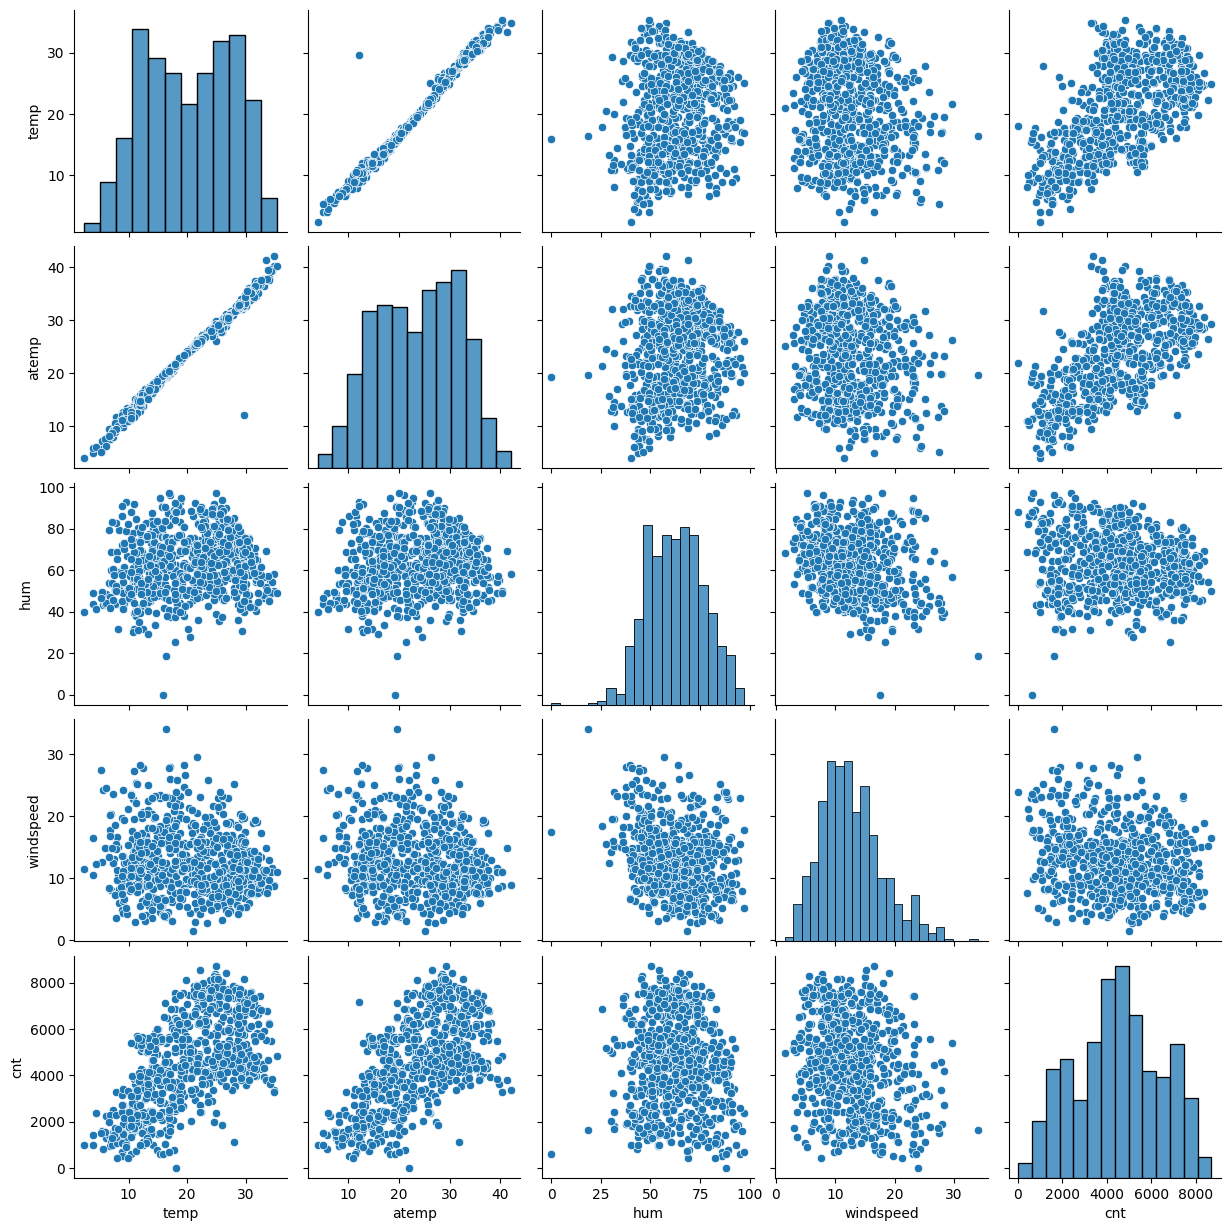

In [25]:
sns.pairplot(data=records,vars=num_variables)

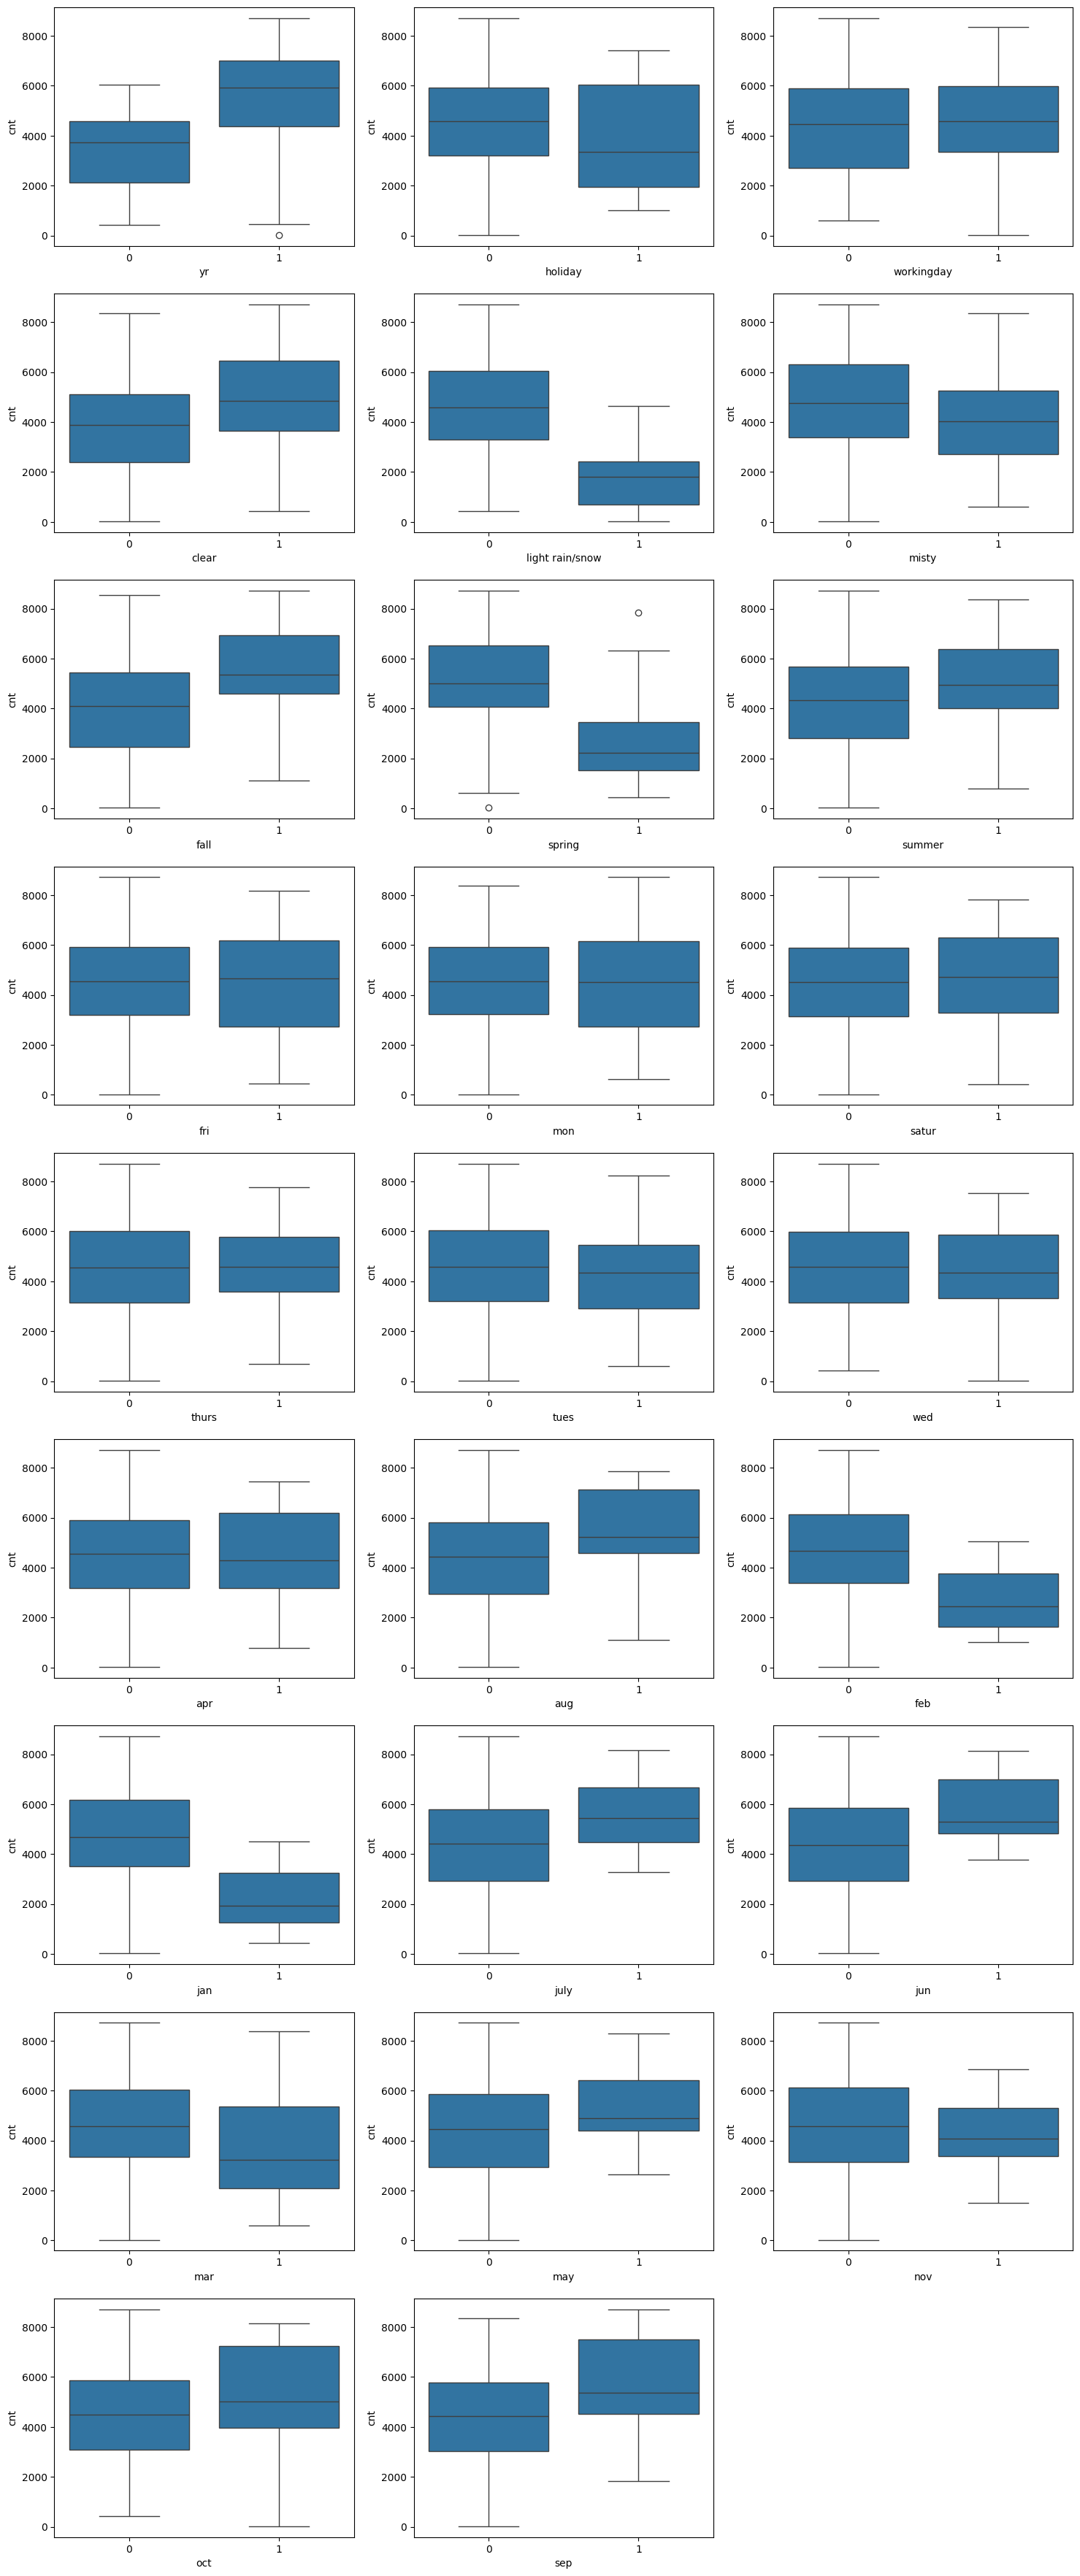

In [26]:
cols=3
rows=len(cat_variables)//cols+1
plt.figure(figsize=(cols*6, rows*5))
for i in range(len(cat_variables)):
    plt.subplot(rows,cols,i+1)
    sns.boxplot(x = cat_variables[i], y = 'cnt', data = records)
plt.show()

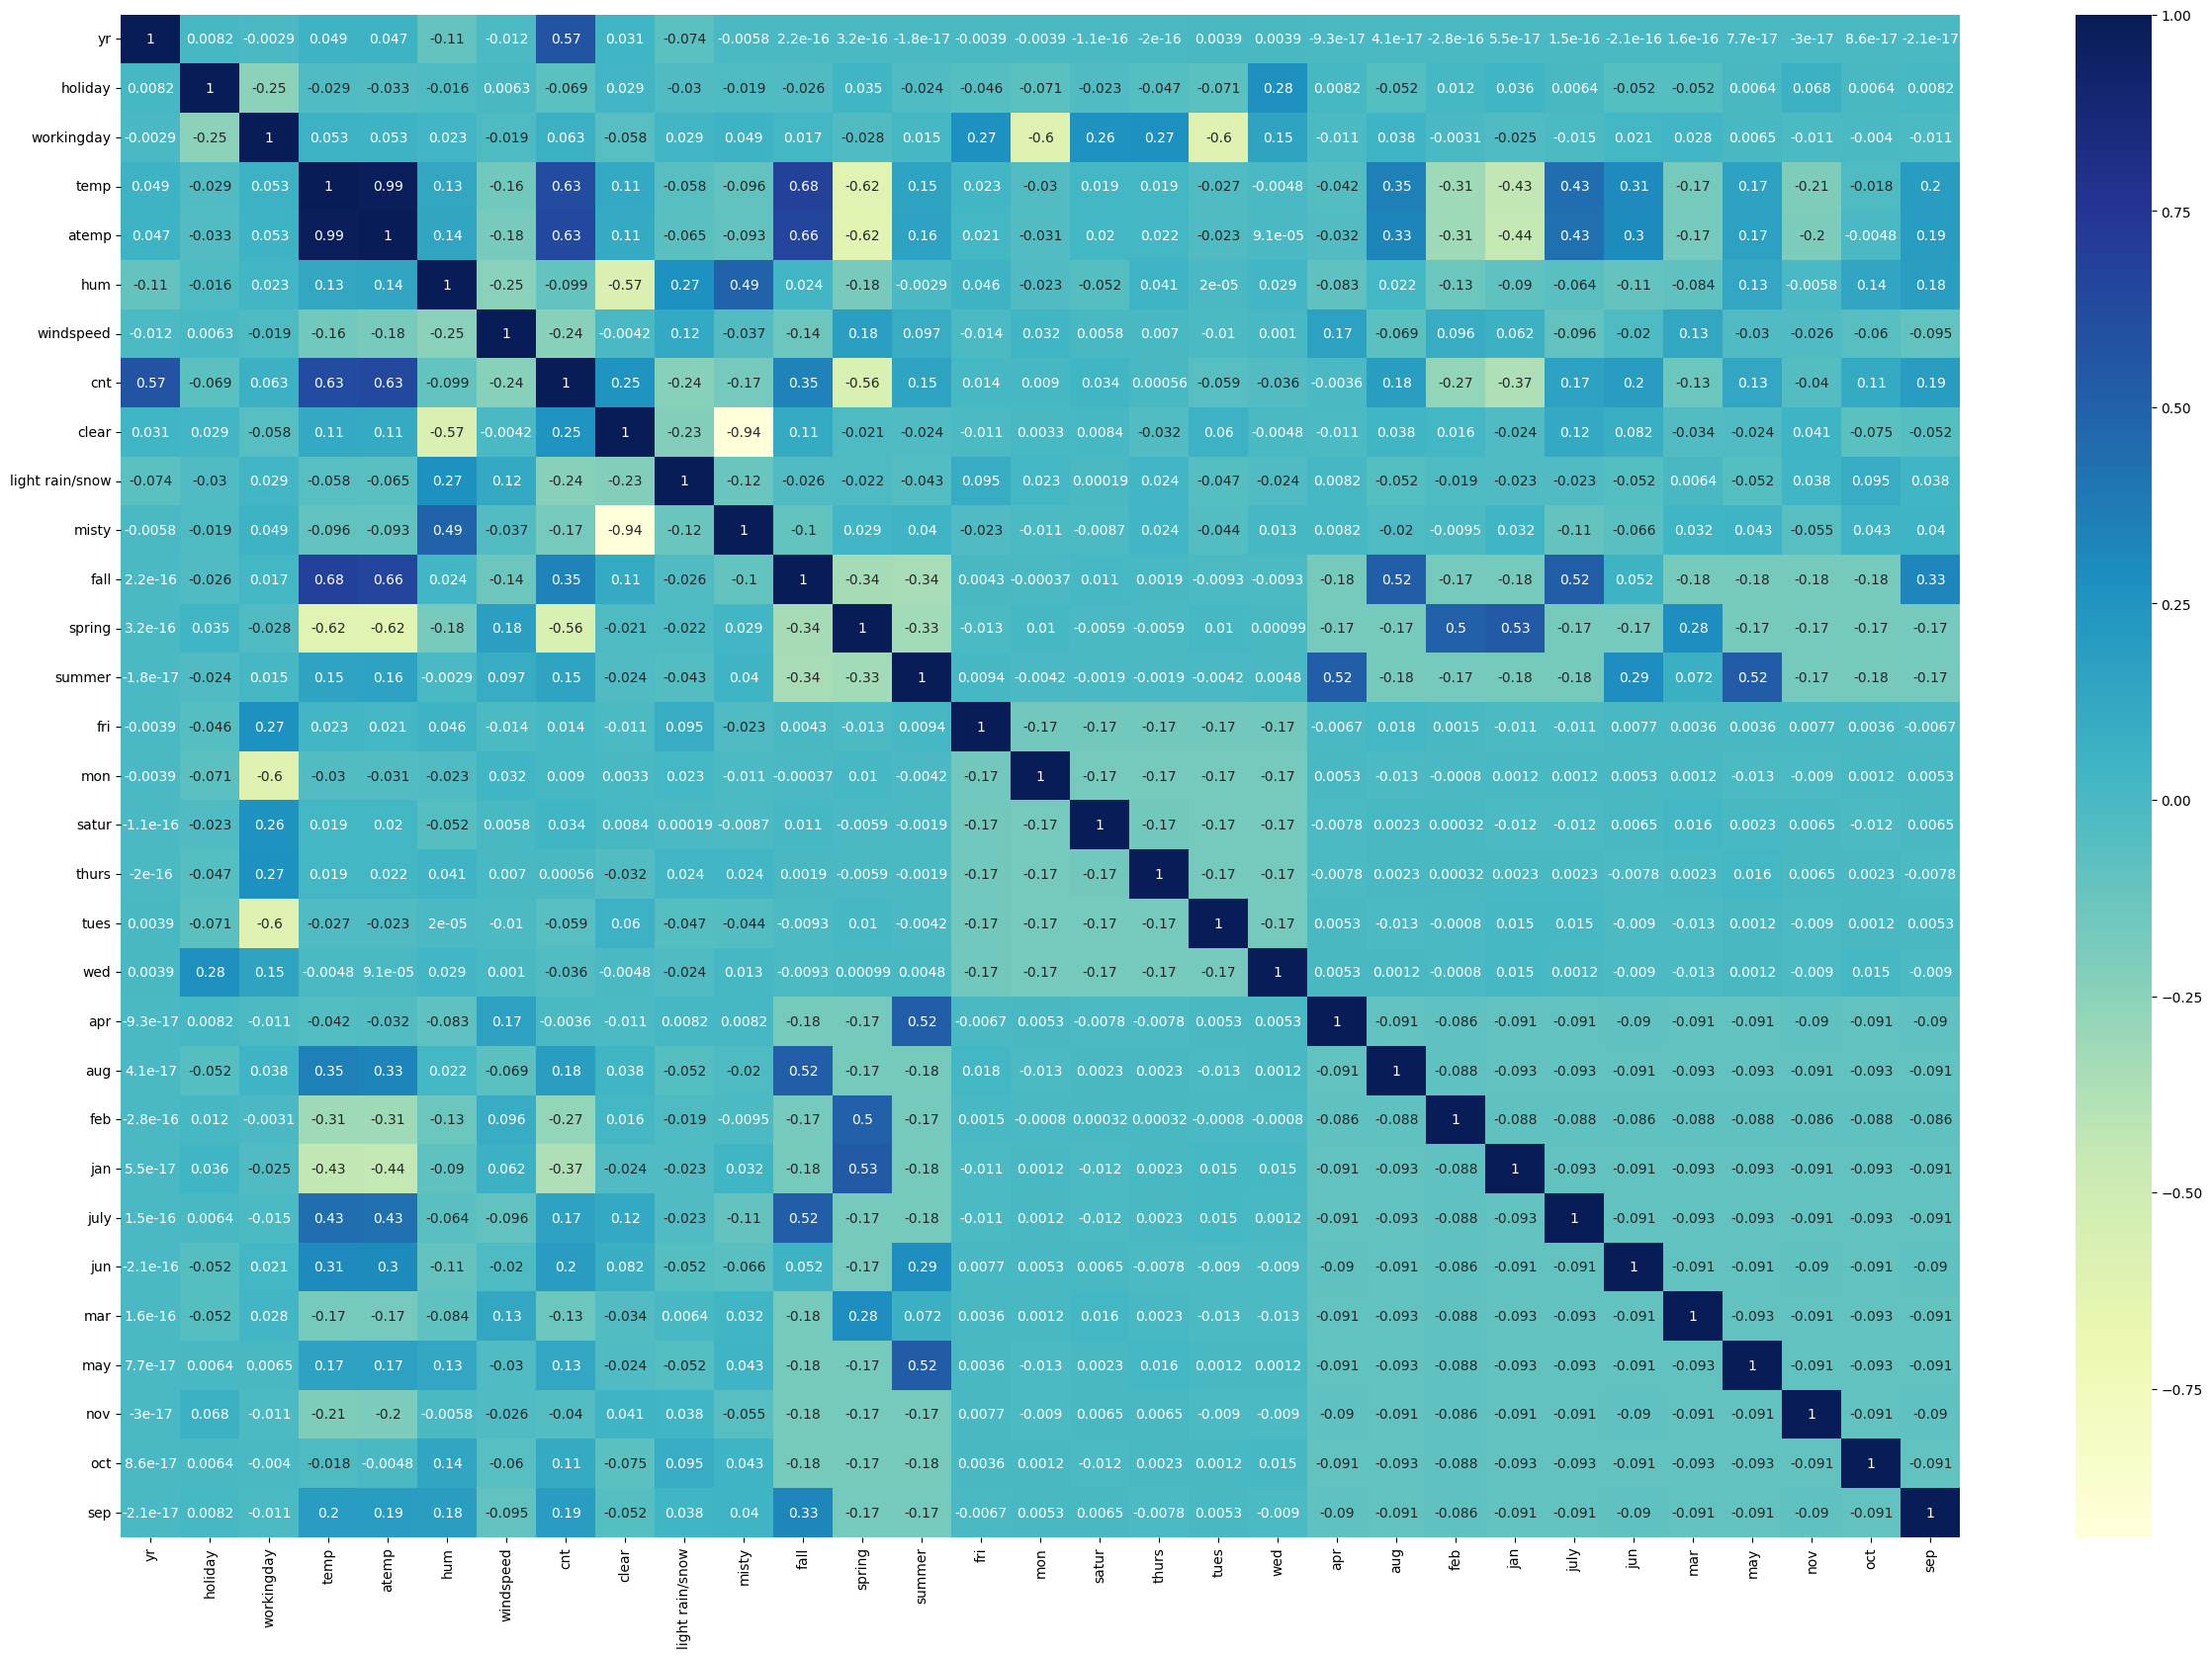

In [27]:
plt.figure(figsize=(30,20))
sns.heatmap(records.corr(), annot = True, cmap="YlGnBu")
plt.show()

## Model Building

### Adding method for calculating VIF for a given X_data
##### We are dropping 'const' term as it should not be considered for calculating VIF

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
def calculate_vif(X_df):
    X = X_df
    if 'const' in X_df.columns:
        X = X_df.drop('const',axis=1)
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)

### Adding a method for removing columns and calculate VIF after that

In [29]:
def remove_variable(X_df,cols_to_drop):
    X_df = X_df.drop(cols_to_drop,axis=1)
    calculate_vif(X_df)
    plt.figure(figsize=(30,20))
    sns.heatmap(X_df.corr(), annot = True, cmap="YlGnBu")
    plt.show()
    return X_df

### Adding a method for building an OLS model of statsmodels api

In [30]:
def build_ols_model(X,y):
    model = sm.OLS(y,X).fit() 
    print(model.summary())
    return model

### Deriving dependent(y) and independent(X) variables
#### Here we are trying to build the model to predict the 'cnt' which indicates the total no of bikes rented hence it is y variable & rest are X variables

In [31]:
y_train = records_train.pop('cnt')
X_train = records_train

### Checking the total no of X variables

In [32]:
n=len(X_train.columns)

### Calculating VIF initially

In [33]:
calculate_vif(X_train)

C:\Users\Swarnali Sen\AppData\Roaming\Python\Python312\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


           Features    VIF
9             misty    inf
7             clear    inf
1           holiday    inf
14              mon    inf
8   light rain/snow    inf
17             tues    inf
2        workingday    inf
3              temp  67.12
4             atemp  56.09
12           summer  10.68
10             fall   9.86
11           spring   8.08
20              aug   7.84
23             july   7.07
26              may   6.32
24              jun   5.98
19              apr   5.32
29              sep   4.69
25              mar   3.95
22              jan   3.68
21              feb   3.02
28              oct   2.55
27              nov   2.25
5               hum   2.05
18              wed   1.98
13              fri   1.94
15            satur   1.83
16            thurs   1.80
6         windspeed   1.30
0                yr   1.06


### Dropping the 'atemp' as it is highly correlated with 'temp' (as can be seen in the plot and heatmap of the correlation) and hence not required for our model

C:\Users\Swarnali Sen\AppData\Roaming\Python\Python312\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


           Features    VIF
8             misty    inf
6             clear    inf
1           holiday    inf
13              mon    inf
7   light rain/snow    inf
16             tues    inf
2        workingday    inf
11           summer  10.68
9              fall   9.84
10           spring   8.08
19              aug   7.72
3              temp   7.12
22             july   7.03
25              may   6.30
23              jun   5.92
18              apr   5.32
28              sep   4.67
24              mar   3.95
21              jan   3.68
20              feb   3.02
27              oct   2.55
26              nov   2.25
4               hum   2.05
17              wed   1.96
12              fri   1.93
14            satur   1.81
15            thurs   1.79
5         windspeed   1.24
0                yr   1.06


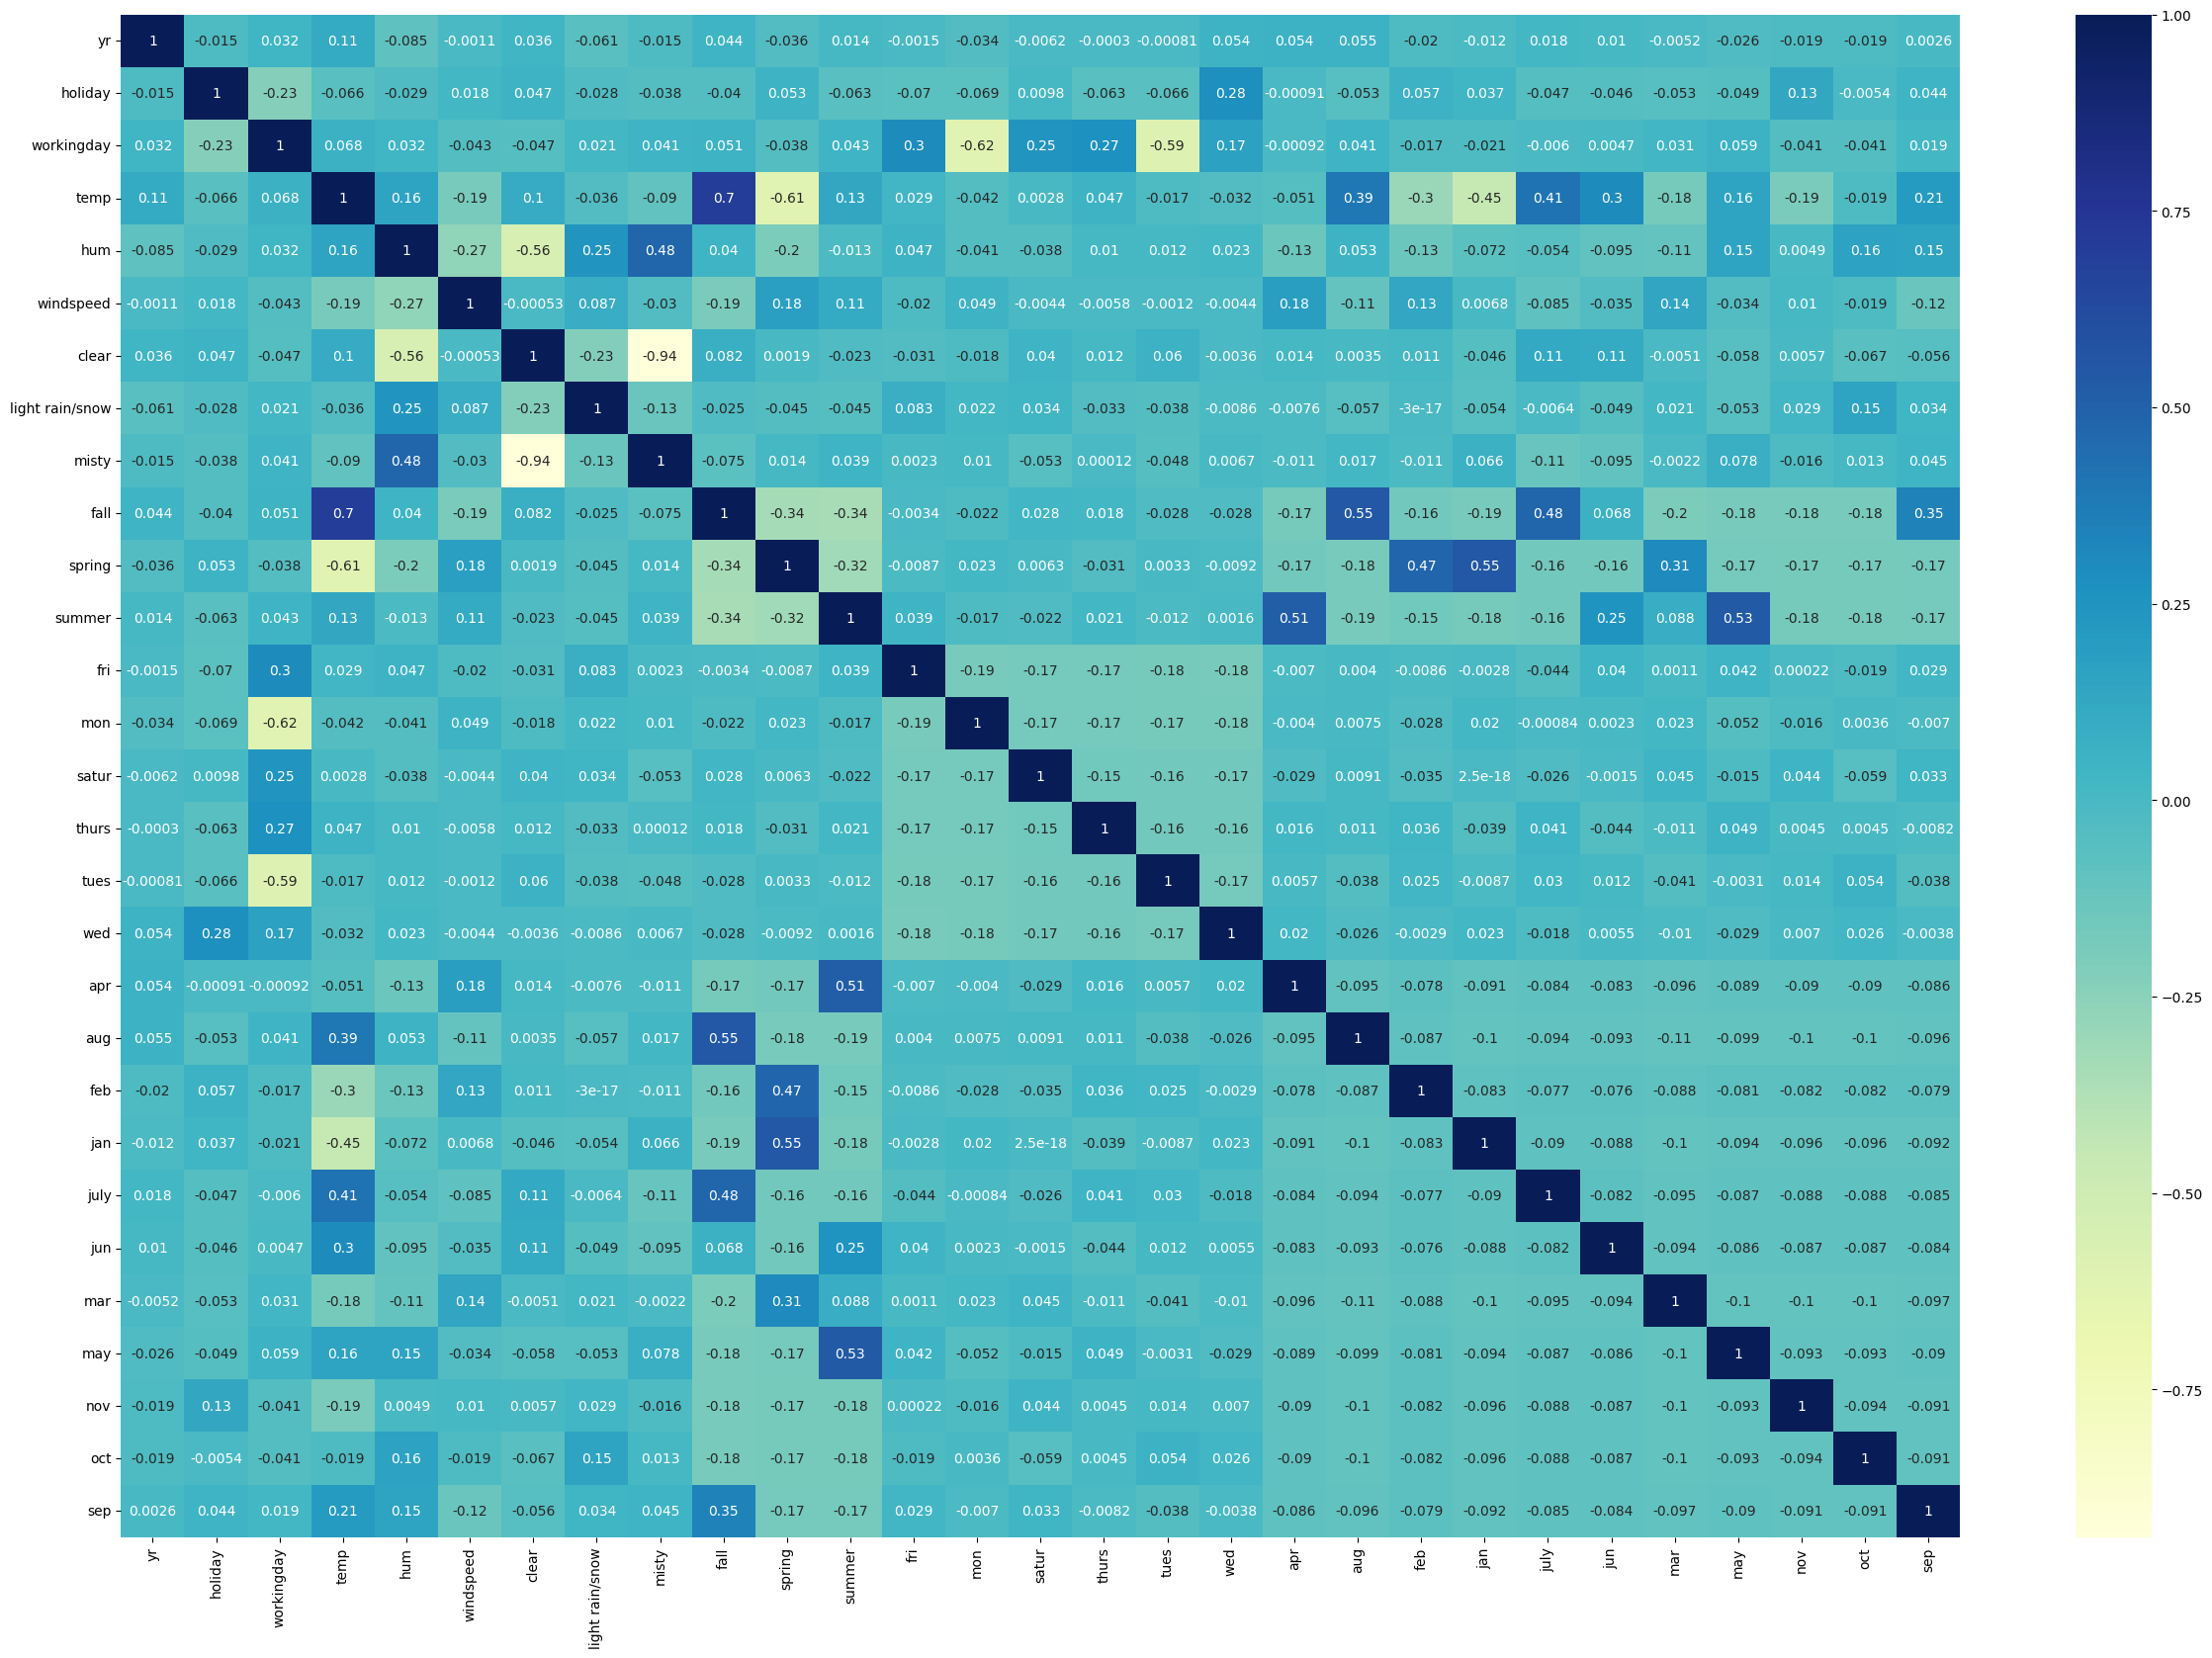

In [34]:
X_train = remove_variable(X_train,'atemp')

### Dropping the 'misty' column as it is highly correlated with 'clear' (as having inf VIF and high negative correlation in heatmap) and hence not required for our model

           Features    VIF
2        workingday  60.55
12              mon  13.71
15             tues  13.51
10           summer  10.68
8              fall   9.84
9            spring   8.08
18              aug   7.72
3              temp   7.12
21             july   7.03
24              may   6.30
22              jun   5.92
17              apr   5.32
27              sep   4.67
23              mar   3.95
20              jan   3.68
1           holiday   3.55
19              feb   3.02
26              oct   2.55
25              nov   2.25
4               hum   2.05
16              wed   1.96
11              fri   1.93
13            satur   1.81
14            thurs   1.79
6             clear   1.66
5         windspeed   1.24
7   light rain/snow   1.16
0                yr   1.06


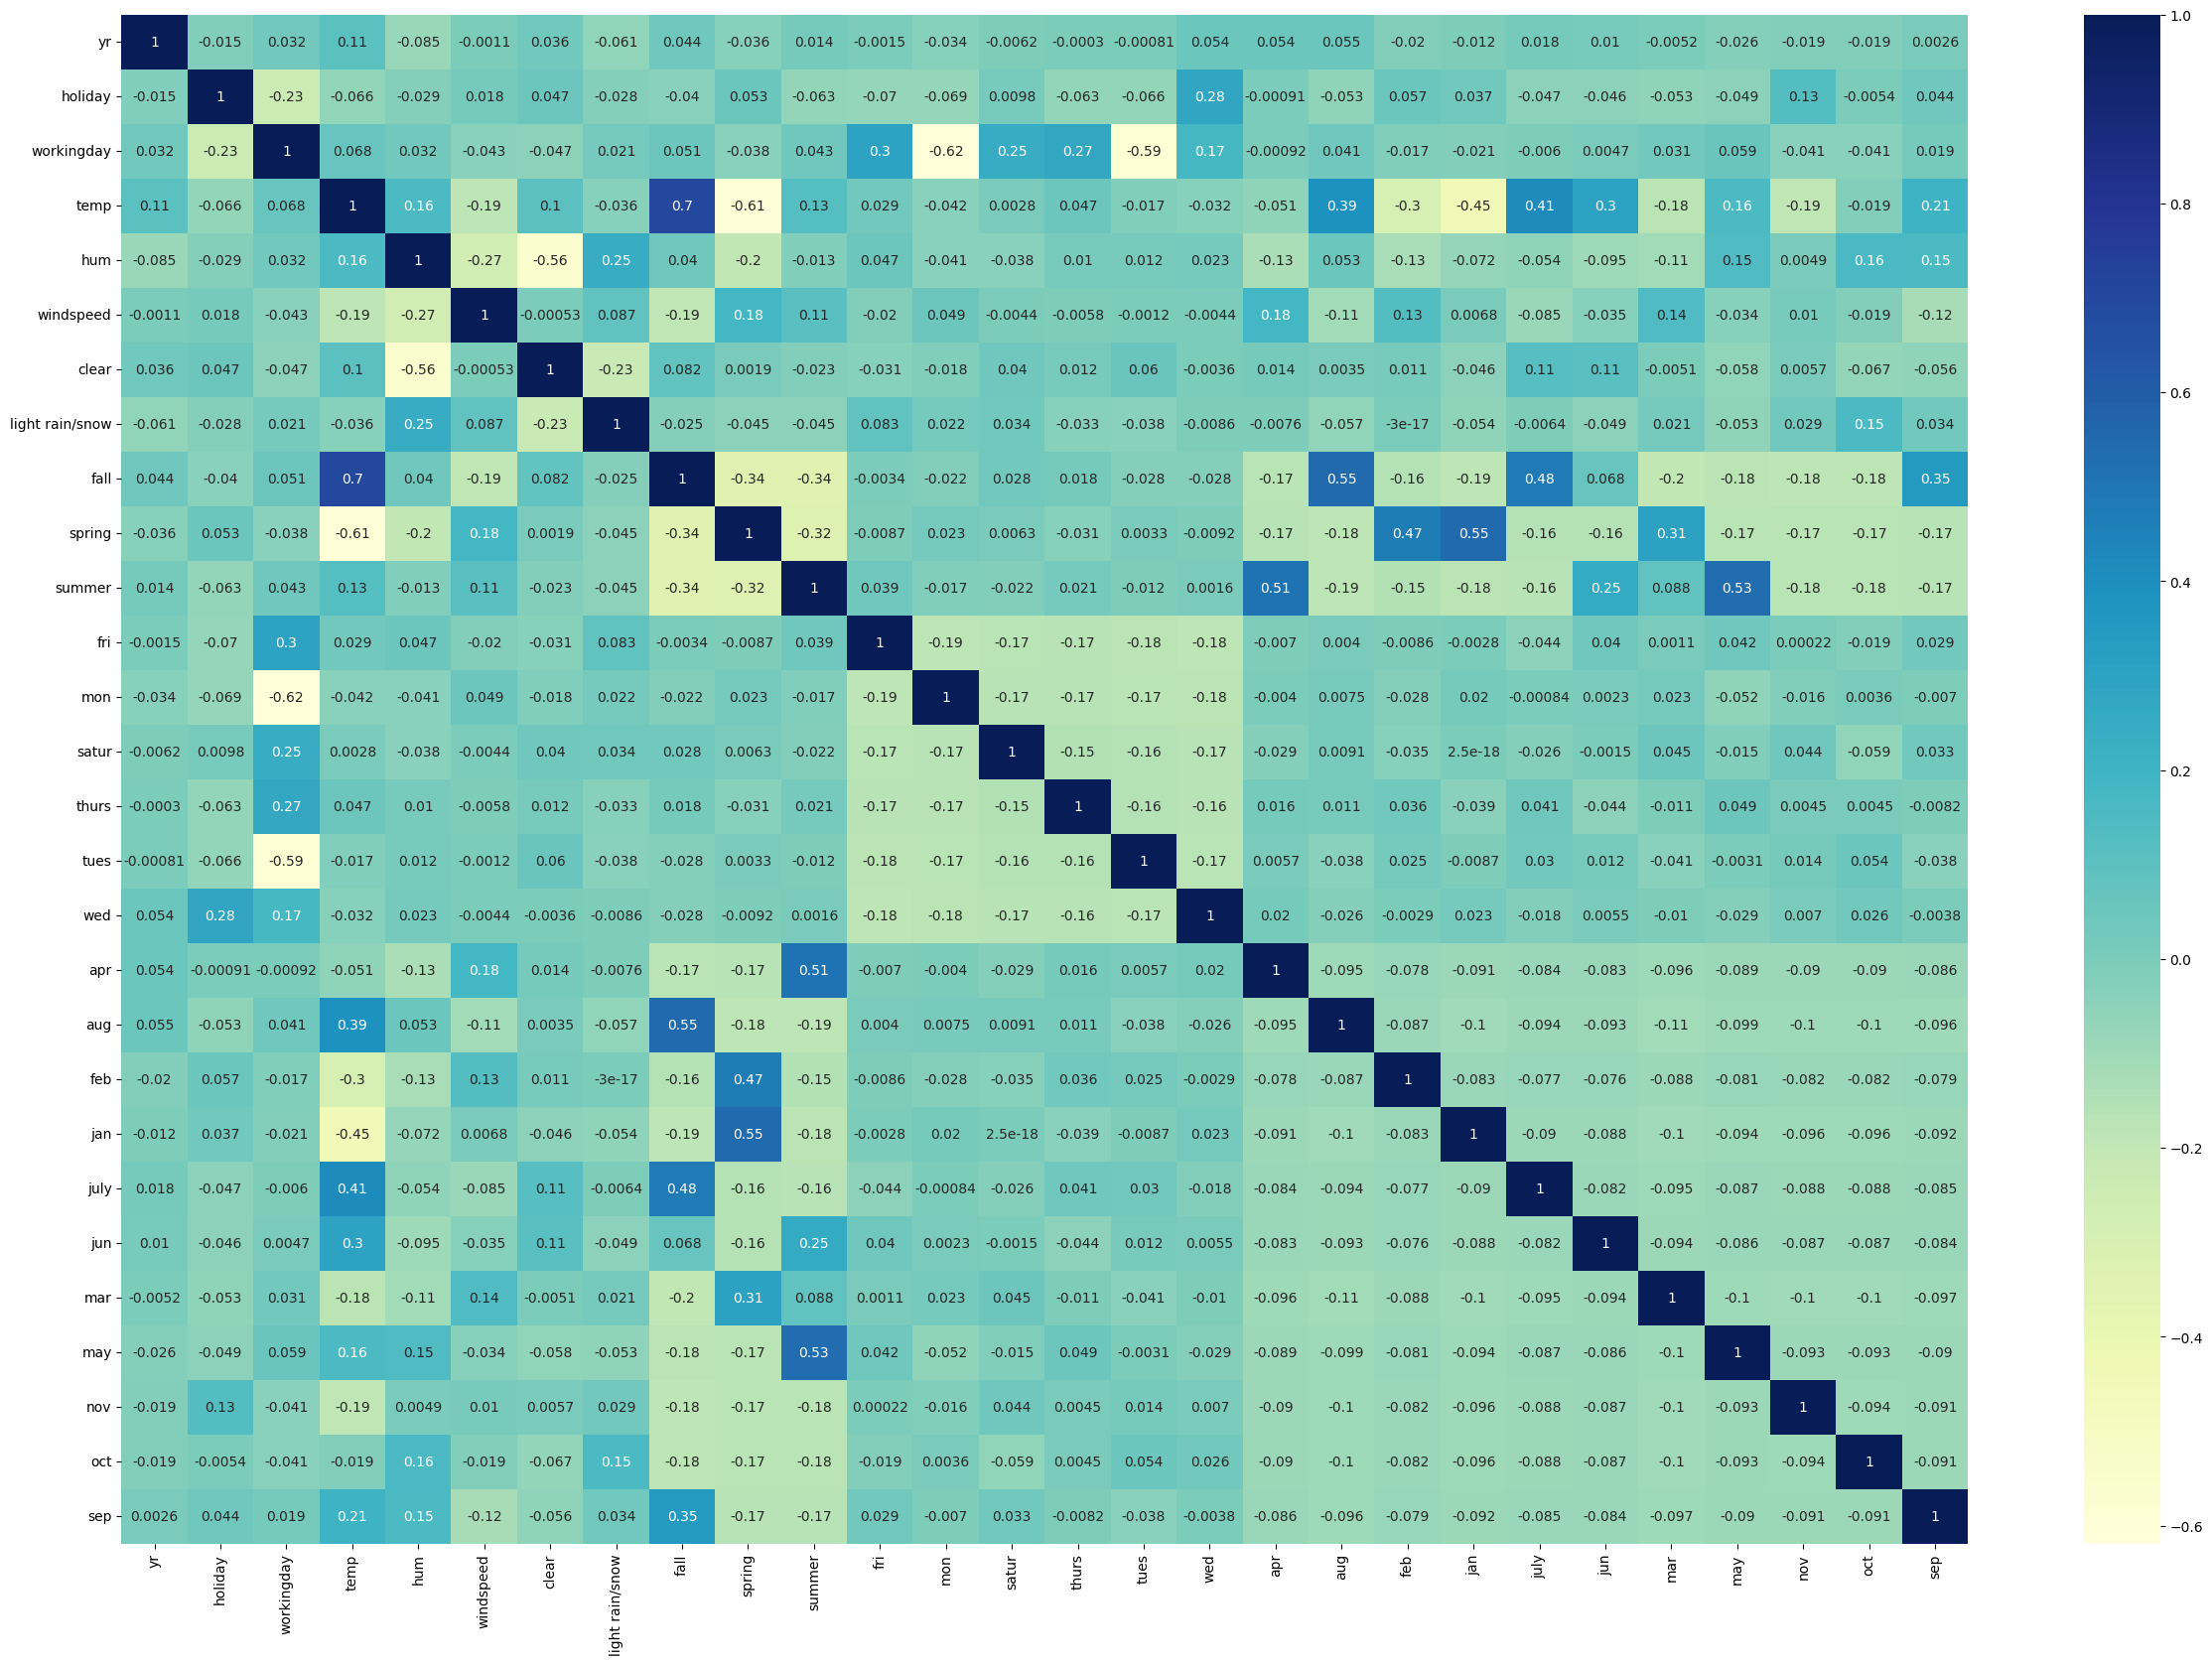

In [35]:
X_train = remove_variable(X_train,'misty')

### Running RFE to select top 20 features 
#### Here 20 selected is just random and after doing further analysis other features will be removed manually

In [36]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=20)
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('clear', True, 1),
 ('light rain/snow', True, 1),
 ('fall', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('fri', False, 7),
 ('mon', True, 1),
 ('satur', False, 6),
 ('thurs', False, 3),
 ('tues', True, 1),
 ('wed', False, 4),
 ('apr', True, 1),
 ('aug', True, 1),
 ('feb', False, 5),
 ('jan', False, 2),
 ('july', False, 9),
 ('jun', True, 1),
 ('mar', True, 1),
 ('may', True, 1),
 ('nov', False, 8),
 ('oct', True, 1),
 ('sep', True, 1)]

### Adding constant column in the X data

In [37]:
X_train_sm = sm.add_constant(X_train)

### We are going to drop the columns rejected by the RFE

In [38]:
cols_to_drop = X_train.columns[~rfe.support_]
print("Columns dropeed using RFE - ",cols_to_drop)

Columns dropeed using RFE -  Index(['fri', 'satur', 'thurs', 'wed', 'feb', 'jan', 'july', 'nov'], dtype='object')


### Dropped the columns and Built the 1st model

           Features    VIF
2        workingday  50.86
11              mon  12.16
12             tues  11.93
10           summer   6.44
8              fall   5.05
3              temp   4.50
17              may   3.43
13              apr   3.10
1           holiday   2.92
9            spring   2.42
15              jun   2.27
4               hum   1.98
14              aug   1.83
6             clear   1.64
16              mar   1.63
18              oct   1.54
19              sep   1.46
5         windspeed   1.22
7   light rain/snow   1.14
0                yr   1.04


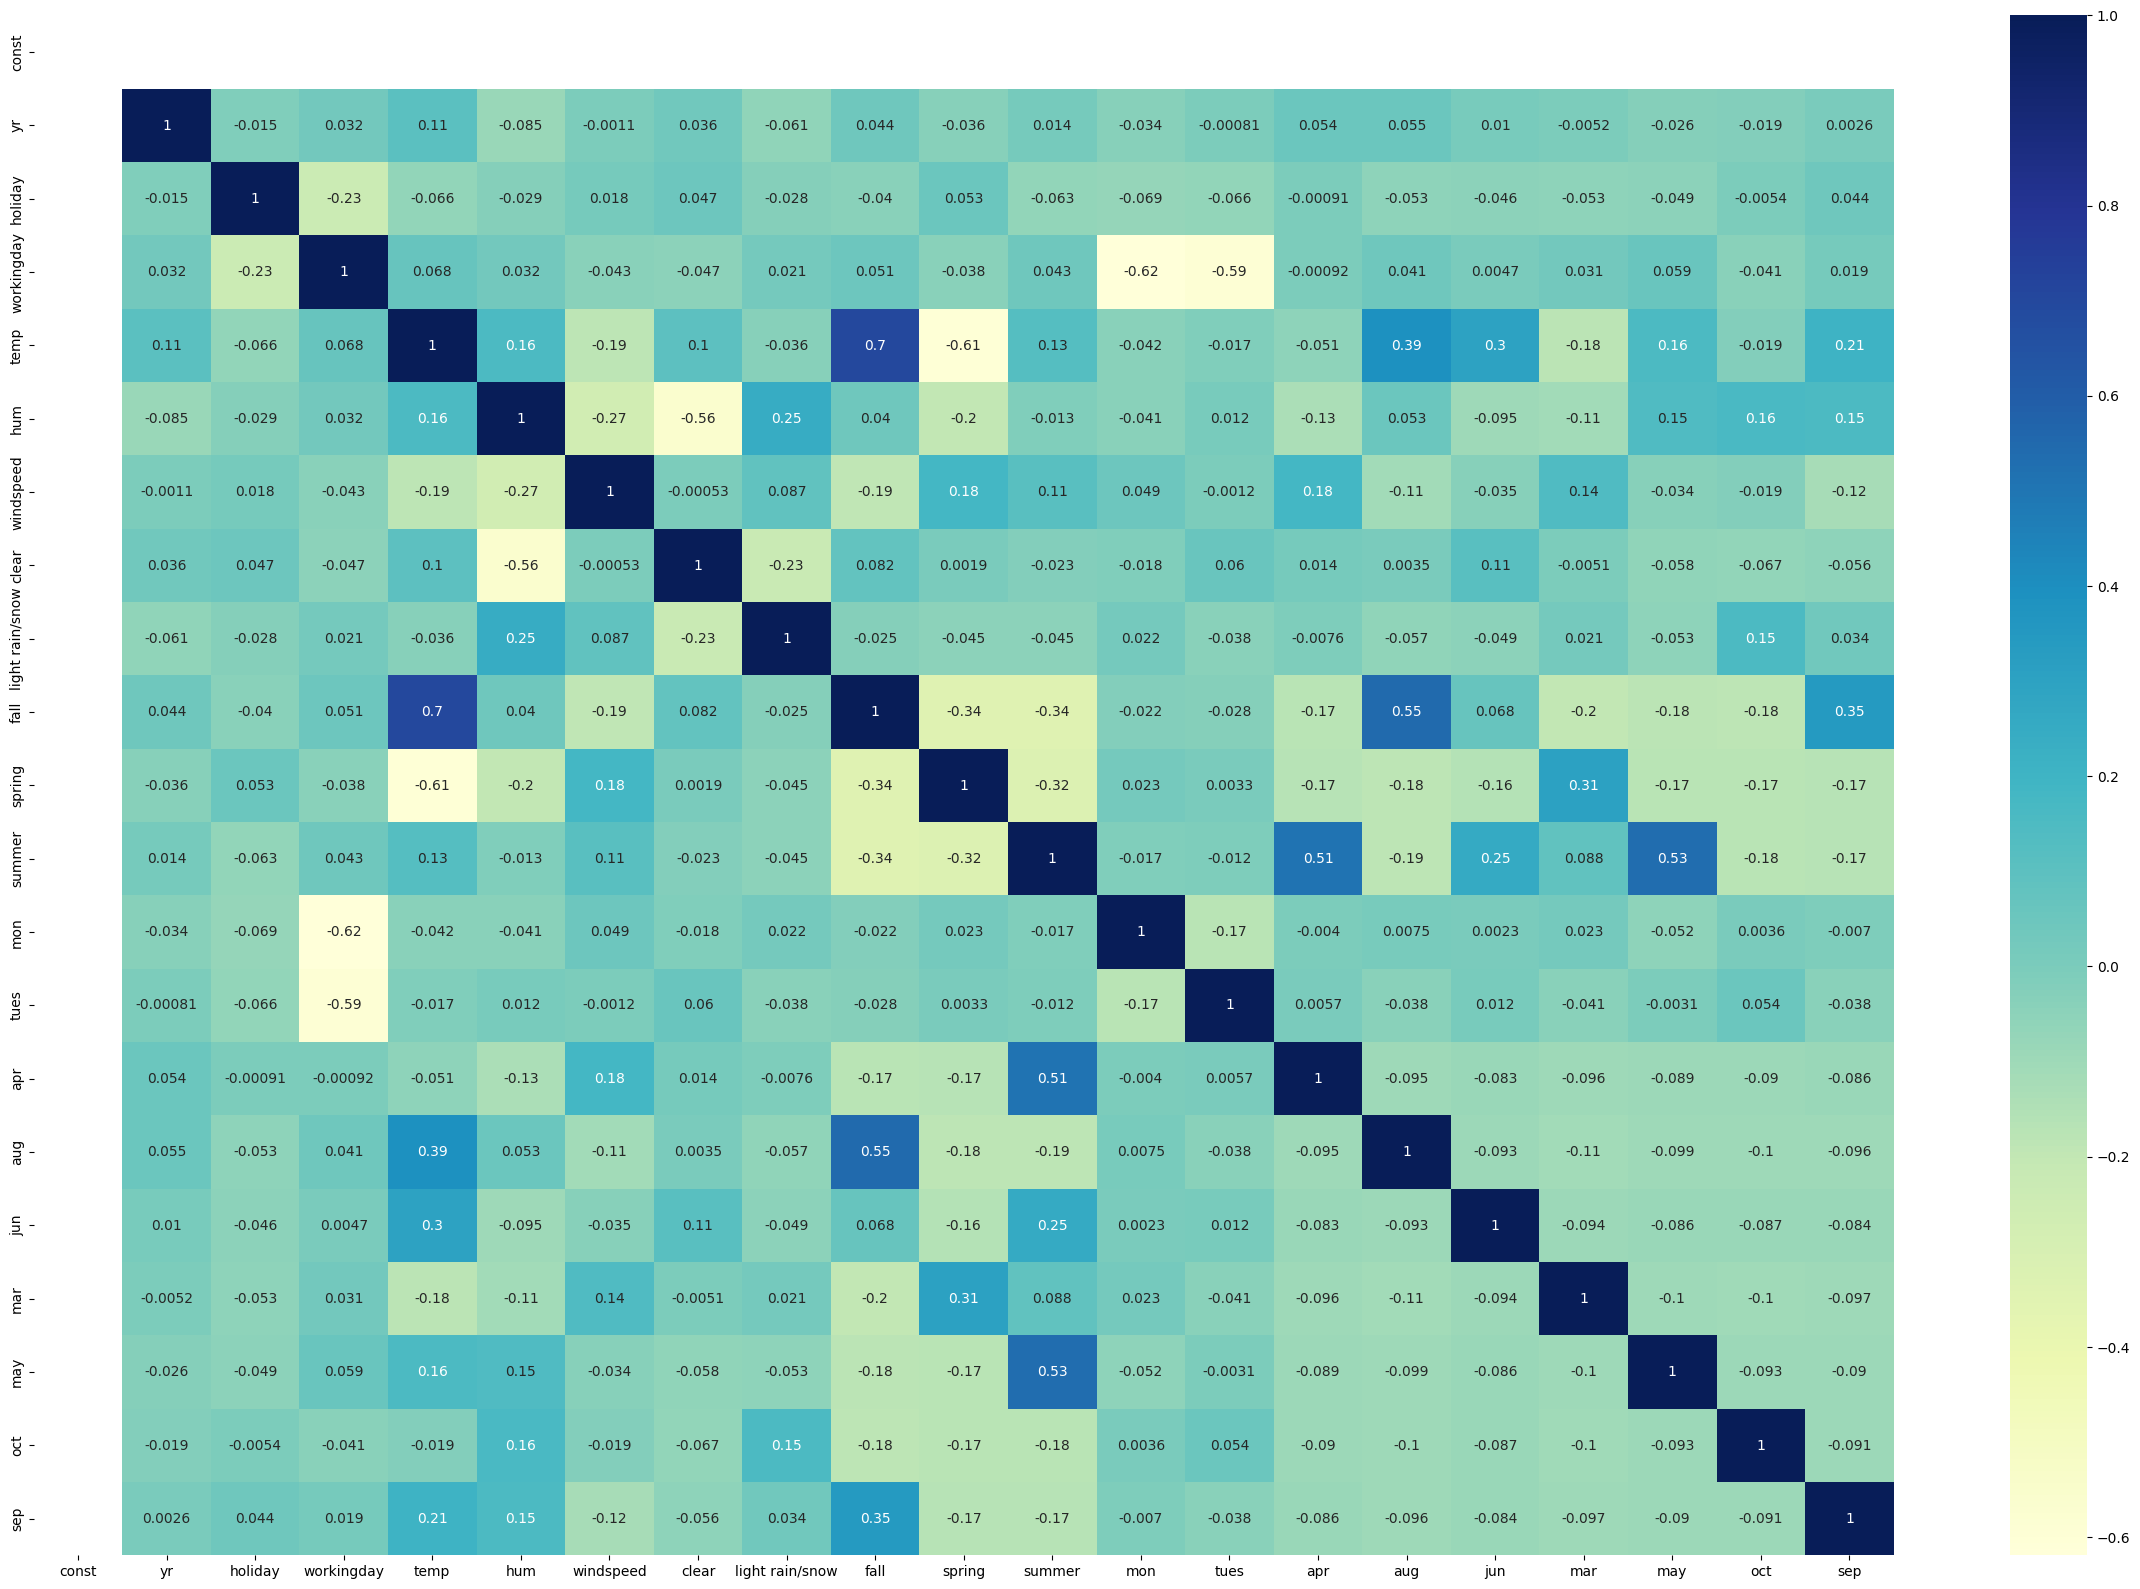

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     148.2
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          3.75e-189
Time:                        23:32:10   Log-Likelihood:                 525.34
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     490   BIC:                            -926.0
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2403      0.027     

In [39]:
X_train_sm_1 = remove_variable(X_train_sm,cols_to_drop)
lm_1 = build_ols_model(X_train_sm_1,y_train)

##### There are few variables with high VIF and few with high p-values. Will remove the ones having high p-values first one by one

### Removing 'holiday' column as it is having high p-value & Building a 2nd model

           Features    VIF
2              temp  29.04
3               hum  23.11
1        workingday  18.53
9            summer   8.48
7              fall   6.85
10              mon   4.91
4         windspeed   4.85
11             tues   4.82
16              may   3.70
5             clear   3.37
12              apr   3.36
8            spring   2.93
14              jun   2.45
0                yr   2.10
13              aug   2.02
15              mar   1.80
17              oct   1.69
18              sep   1.59
6   light rain/snow   1.16


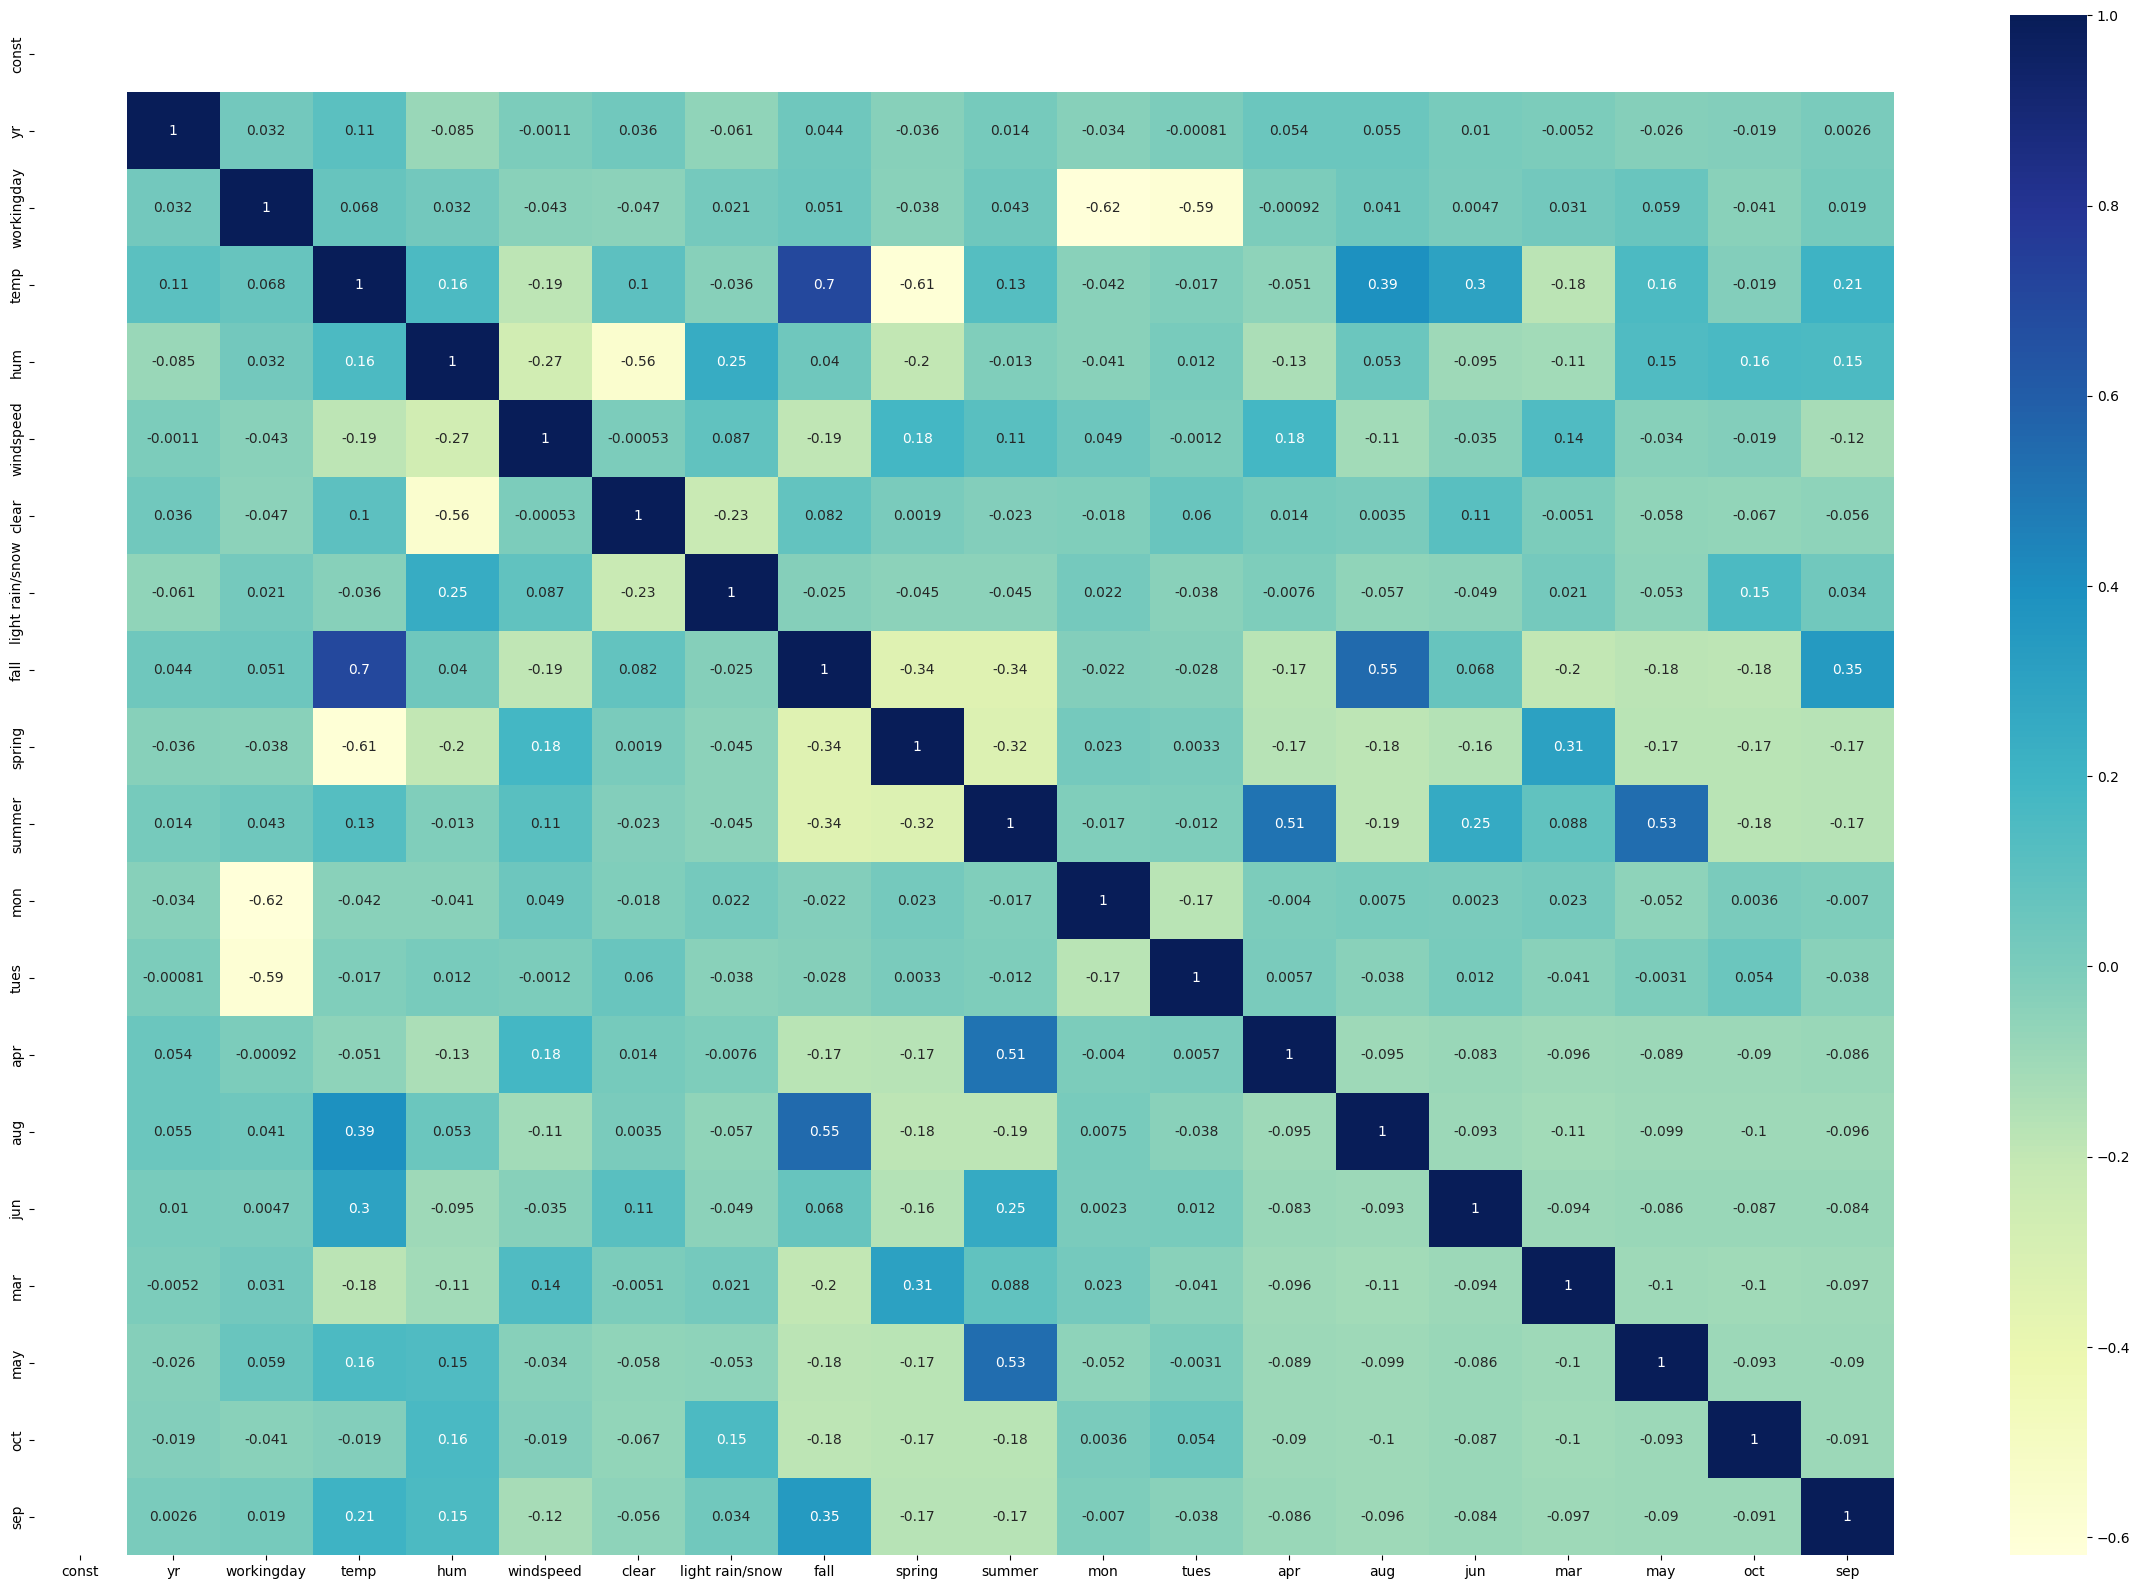

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     148.2
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          3.75e-189
Time:                        23:32:12   Log-Likelihood:                 525.34
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     490   BIC:                            -926.0
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2391      0.042     

In [40]:
X_train_sm_2 = remove_variable(X_train_sm_1,'holiday')
lm_2 = build_ols_model(X_train_sm_2,y_train)

### Removing 'jun' column as it is having high p-value & Building a 3rd model

           Features    VIF
2              temp  25.50
3               hum  22.10
1        workingday  18.53
7              fall   6.84
9            summer   5.95
10              mon   4.91
4         windspeed   4.84
11             tues   4.82
5             clear   3.36
8            spring   2.85
15              may   2.29
12              apr   2.27
0                yr   2.09
13              aug   1.86
16              oct   1.67
17              sep   1.52
14              mar   1.49
6   light rain/snow   1.16


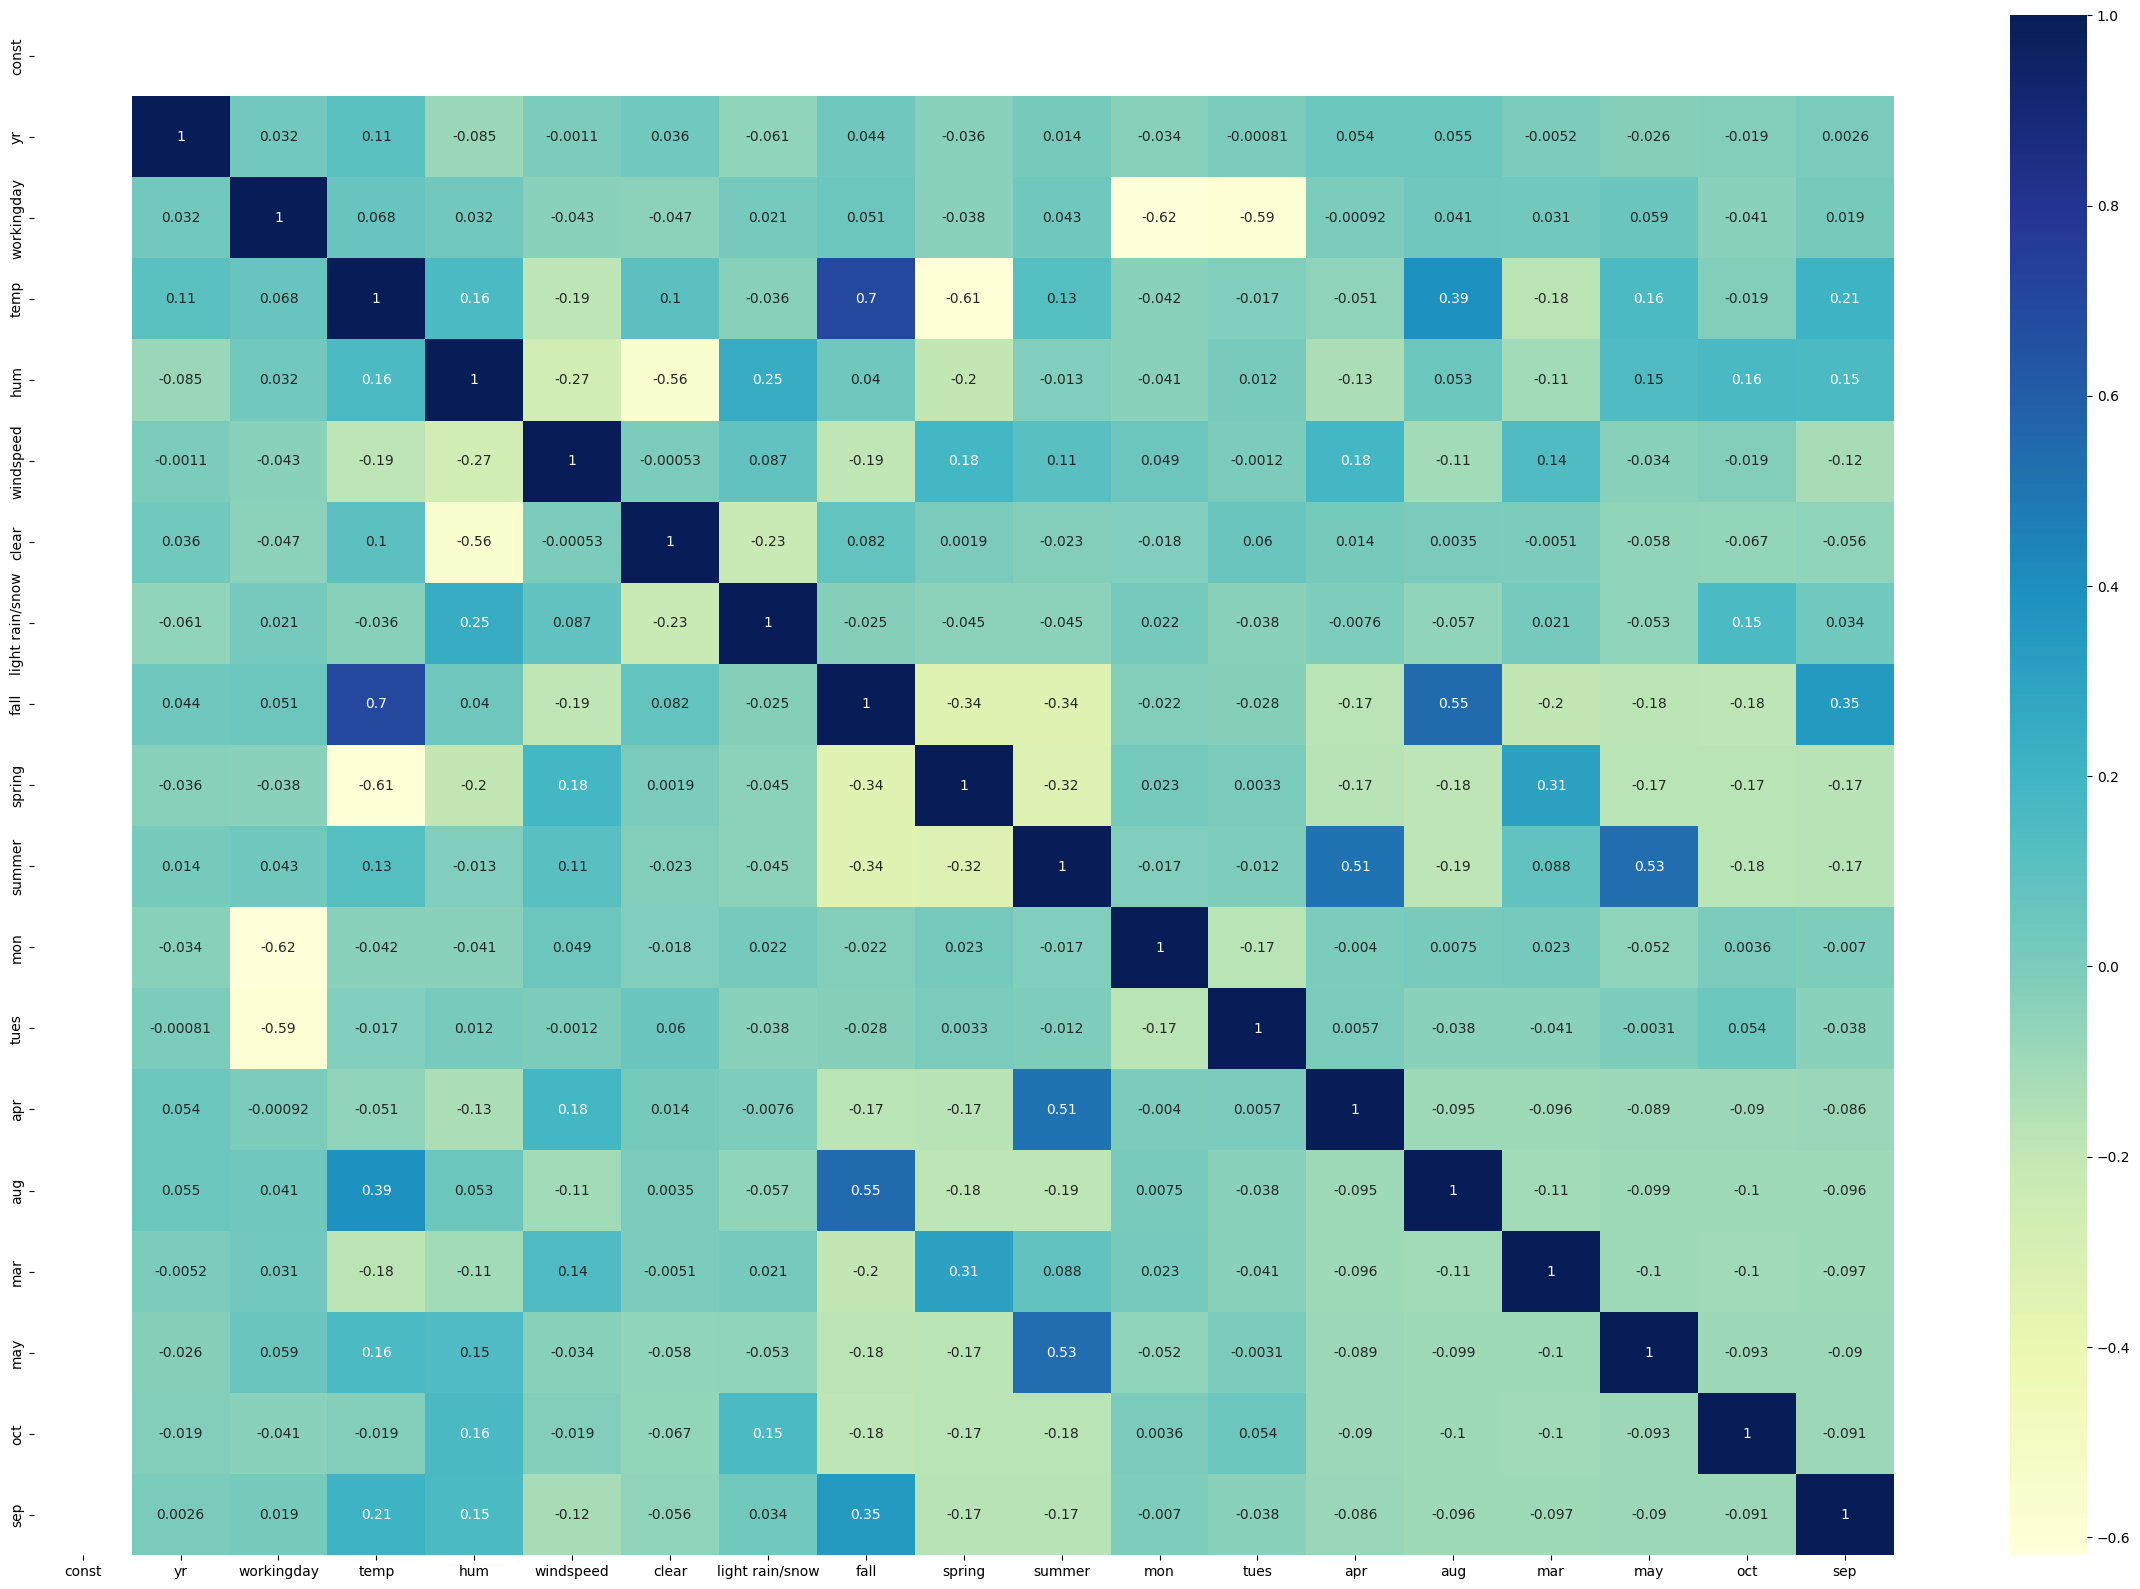

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     155.7
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          1.30e-189
Time:                        23:32:14   Log-Likelihood:                 523.80
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     491   BIC:                            -929.1
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2347      0.042     

In [41]:
X_train_sm_3 = remove_variable(X_train_sm_2,'jun')
lm_3 = build_ols_model(X_train_sm_3,y_train)

### Removing 'apr' column as it is having high p-value & Building a 4th model

           Features    VIF
2              temp  24.93
3               hum  22.09
1        workingday  18.52
7              fall   6.77
10              mon   4.91
11             tues   4.81
4         windspeed   4.75
9            summer   3.70
5             clear   3.36
8            spring   2.84
0                yr   2.08
12              aug   1.86
14              may   1.68
15              oct   1.67
16              sep   1.52
13              mar   1.34
6   light rain/snow   1.16


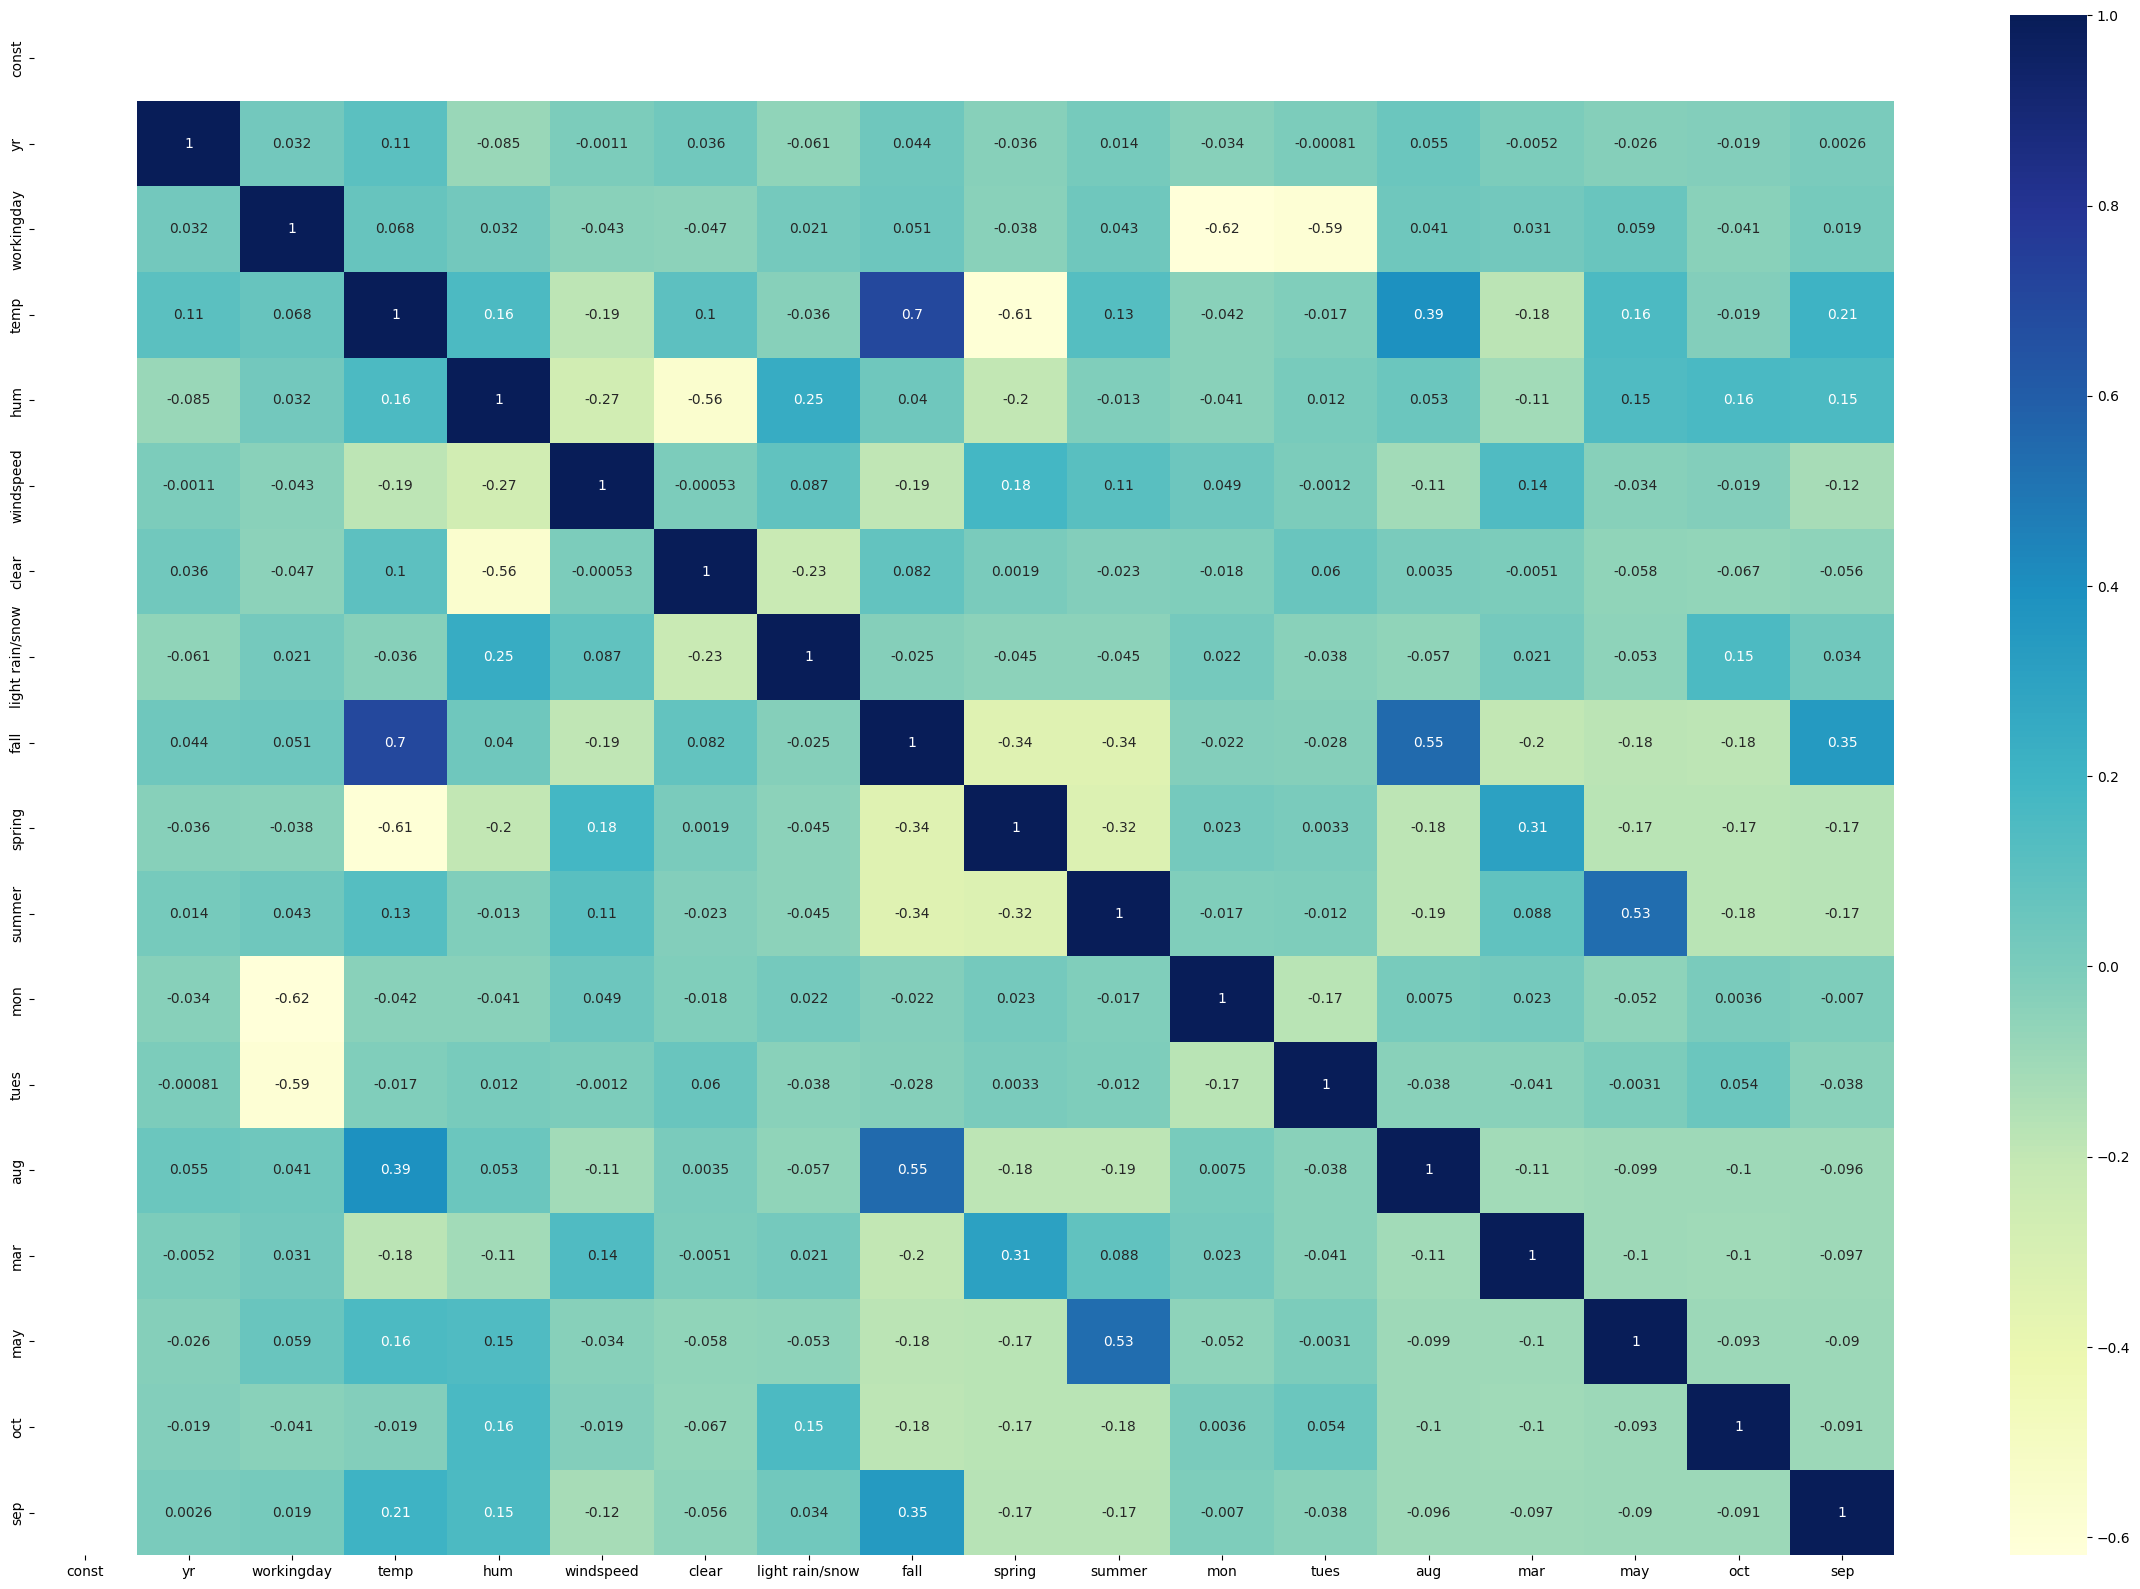

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     164.8
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          1.51e-190
Time:                        23:32:15   Log-Likelihood:                 523.36
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     492   BIC:                            -934.5
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2365      0.042     

In [42]:
X_train_sm_4 = remove_variable(X_train_sm_3,'apr')
lm_4 = build_ols_model(X_train_sm_4,y_train)

### Removing 'may' column as it is having high p-value & Building a 5th model

           Features    VIF
2              temp  24.30
3               hum  22.05
1        workingday  18.45
7              fall   6.68
10              mon   4.88
11             tues   4.80
4         windspeed   4.70
5             clear   3.34
9            summer   3.25
8            spring   2.82
0                yr   2.07
12              aug   1.86
14              oct   1.66
15              sep   1.52
13              mar   1.30
6   light rain/snow   1.16


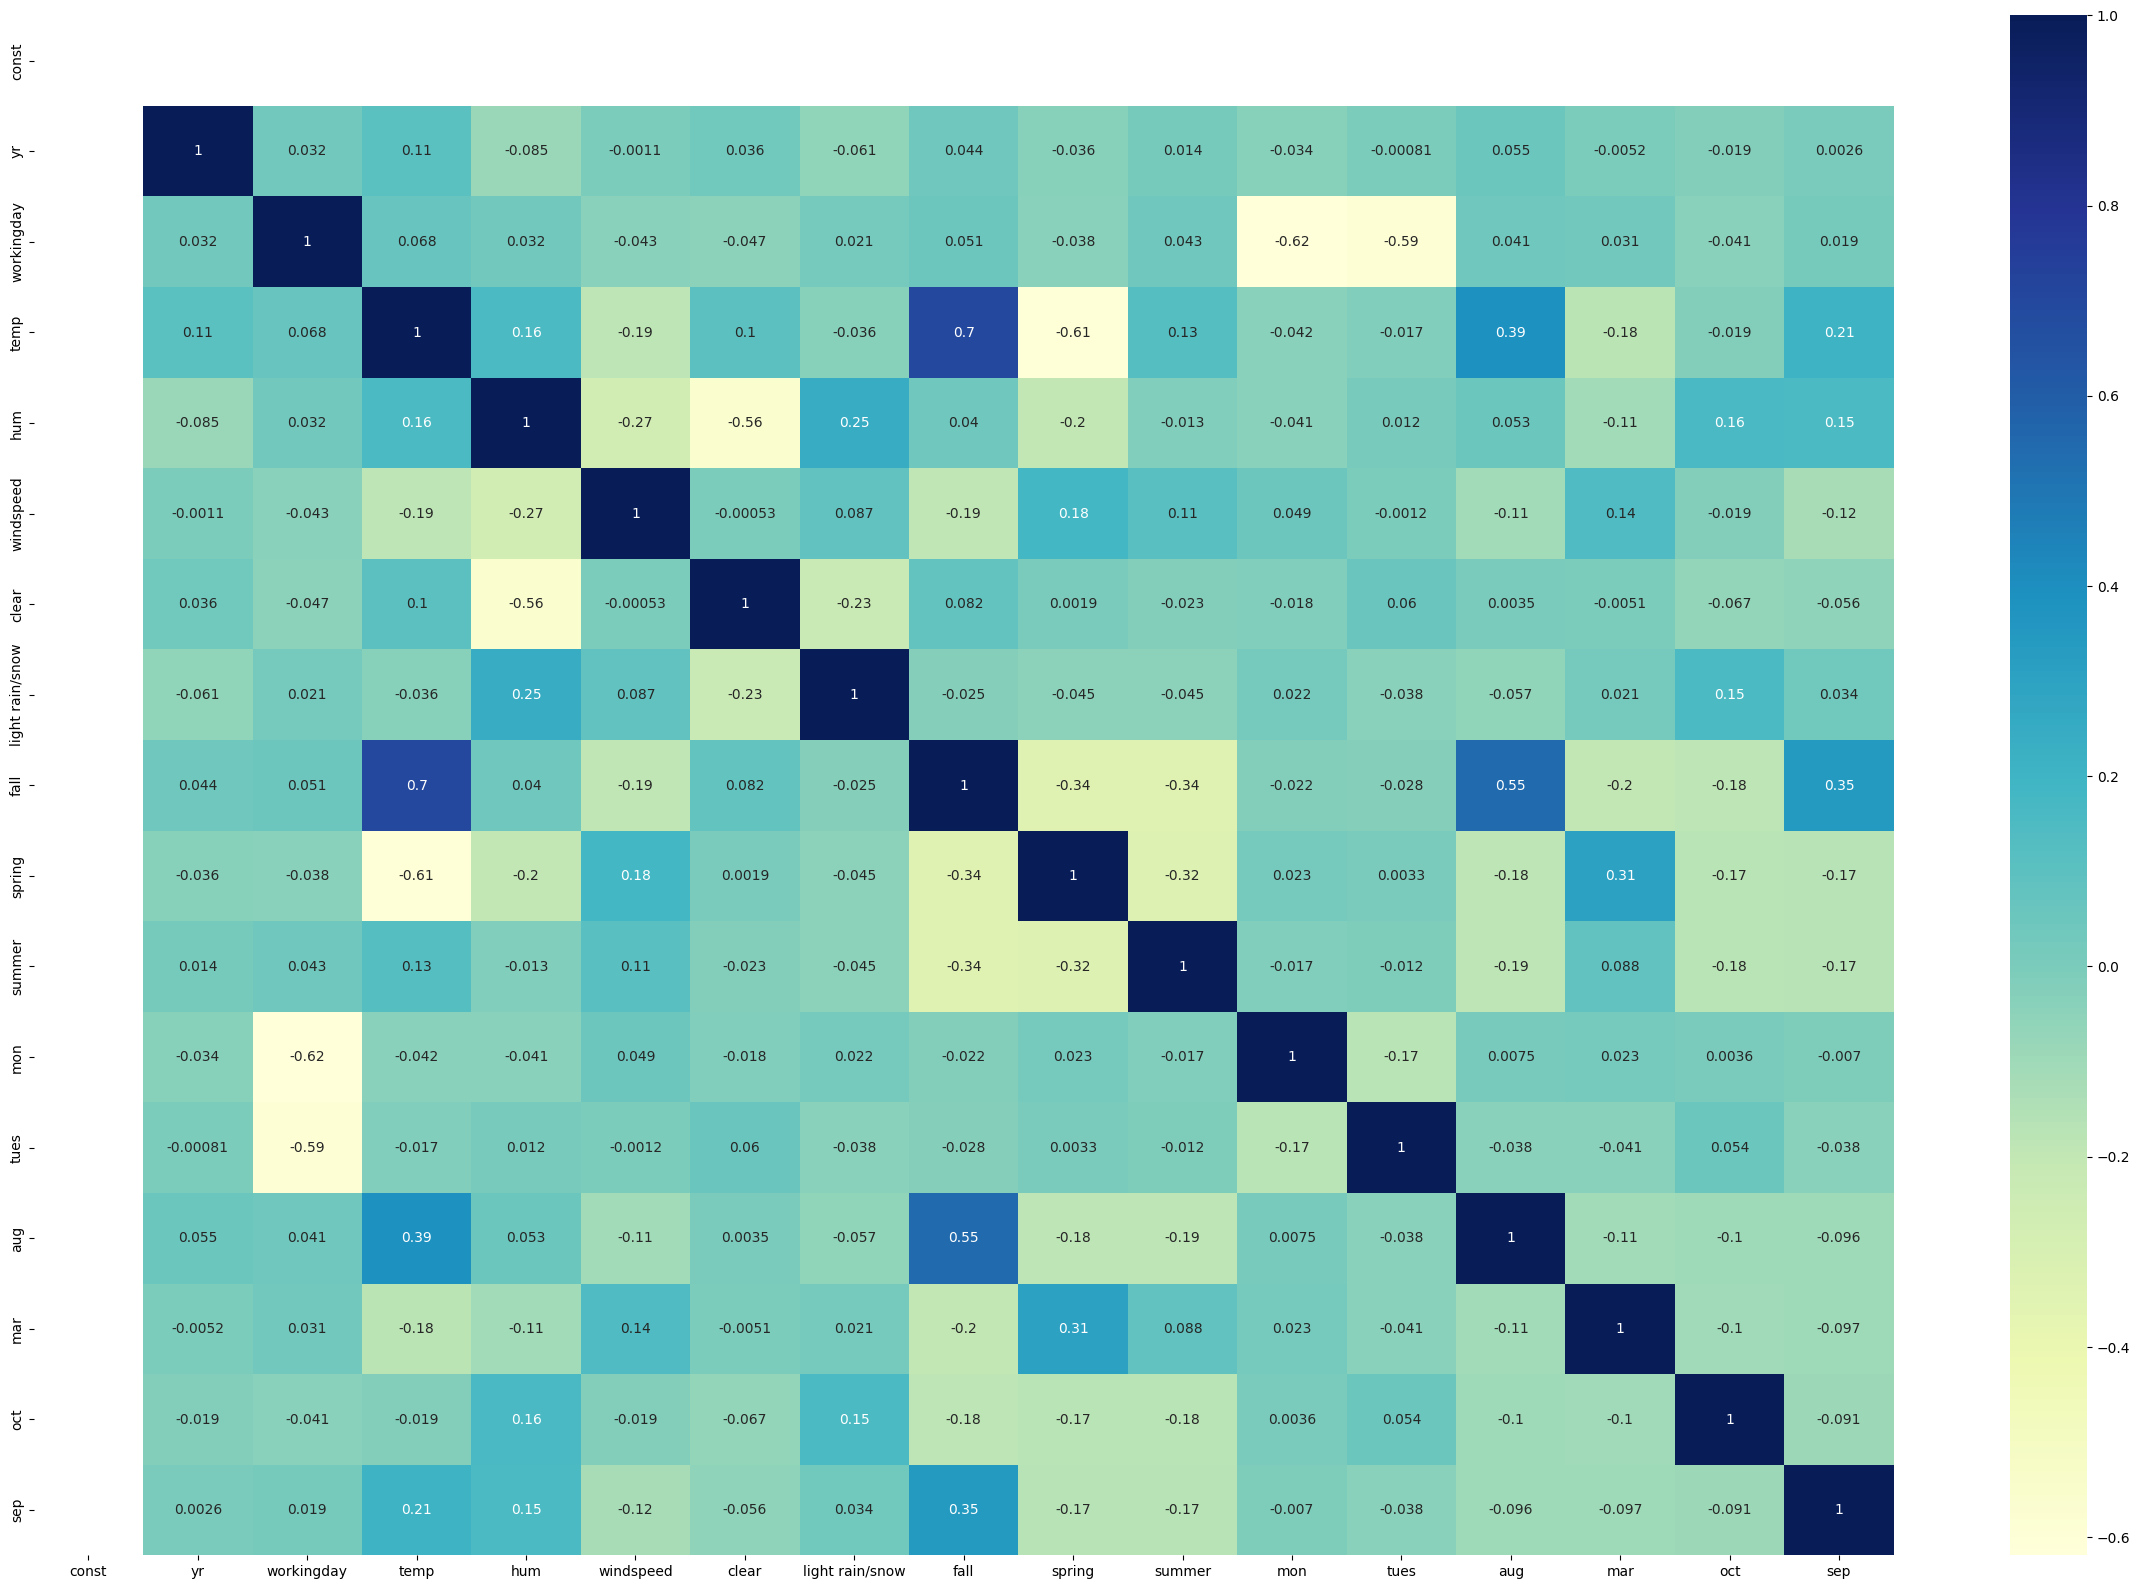

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     174.2
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          4.93e-191
Time:                        23:32:17   Log-Likelihood:                 521.82
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     493   BIC:                            -937.7
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2267      0.041     

In [43]:
X_train_sm_5 = remove_variable(X_train_sm_4,'may')
lm_5 = build_ols_model(X_train_sm_5,y_train)

### Removing 'mar' column as it is having high p-value & Building a 6th model

           Features    VIF
2              temp  24.24
3               hum  21.86
1        workingday  18.39
7              fall   6.67
10              mon   4.86
11             tues   4.79
4         windspeed   4.69
5             clear   3.34
9            summer   3.21
8            spring   2.62
0                yr   2.07
12              aug   1.86
13              oct   1.66
14              sep   1.52
6   light rain/snow   1.16


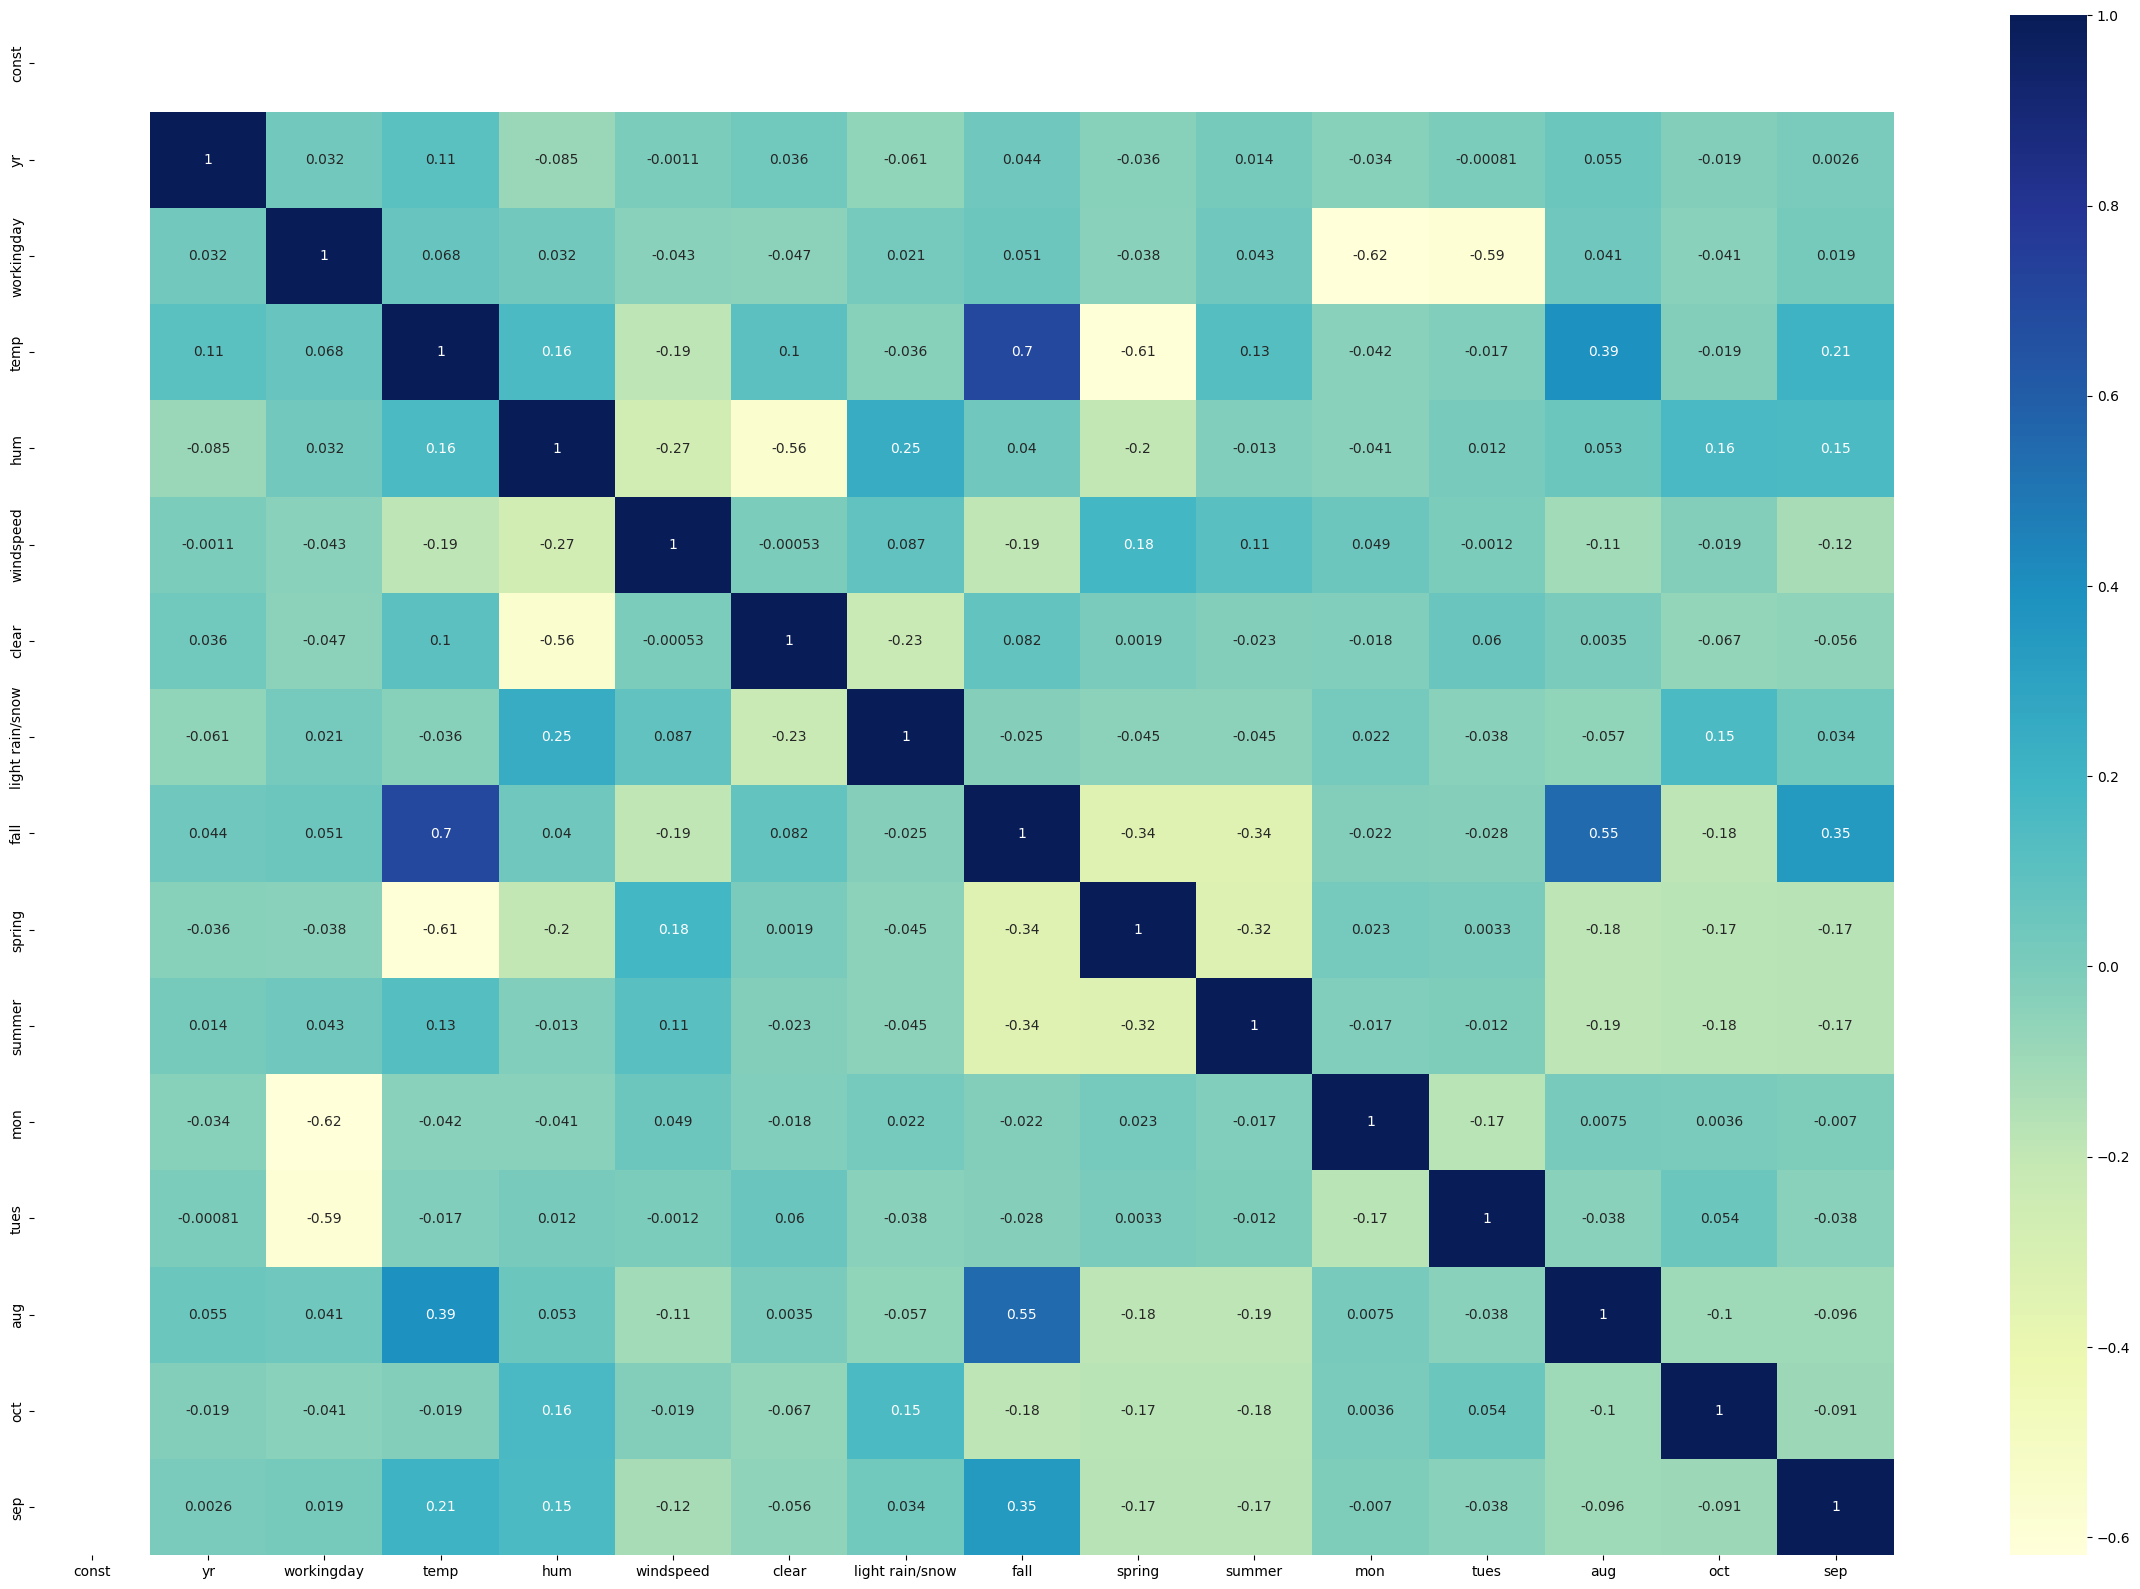

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.7
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          1.89e-191
Time:                        23:32:19   Log-Likelihood:                 520.09
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2242      0.042     

In [44]:
X_train_sm_6 = remove_variable(X_train_sm_5,'mar')
lm_6 = build_ols_model(X_train_sm_6,y_train)

### Removing 'summer' column as it is having high p-value & Building a 7th model

           Features    VIF
3               hum  21.64
2              temp  19.43
1        workingday  18.09
9               mon   4.81
10             tues   4.74
4         windspeed   4.60
7              fall   4.25
5             clear   3.31
8            spring   2.12
0                yr   2.07
11              aug   1.86
13              sep   1.51
12              oct   1.26
6   light rain/snow   1.16


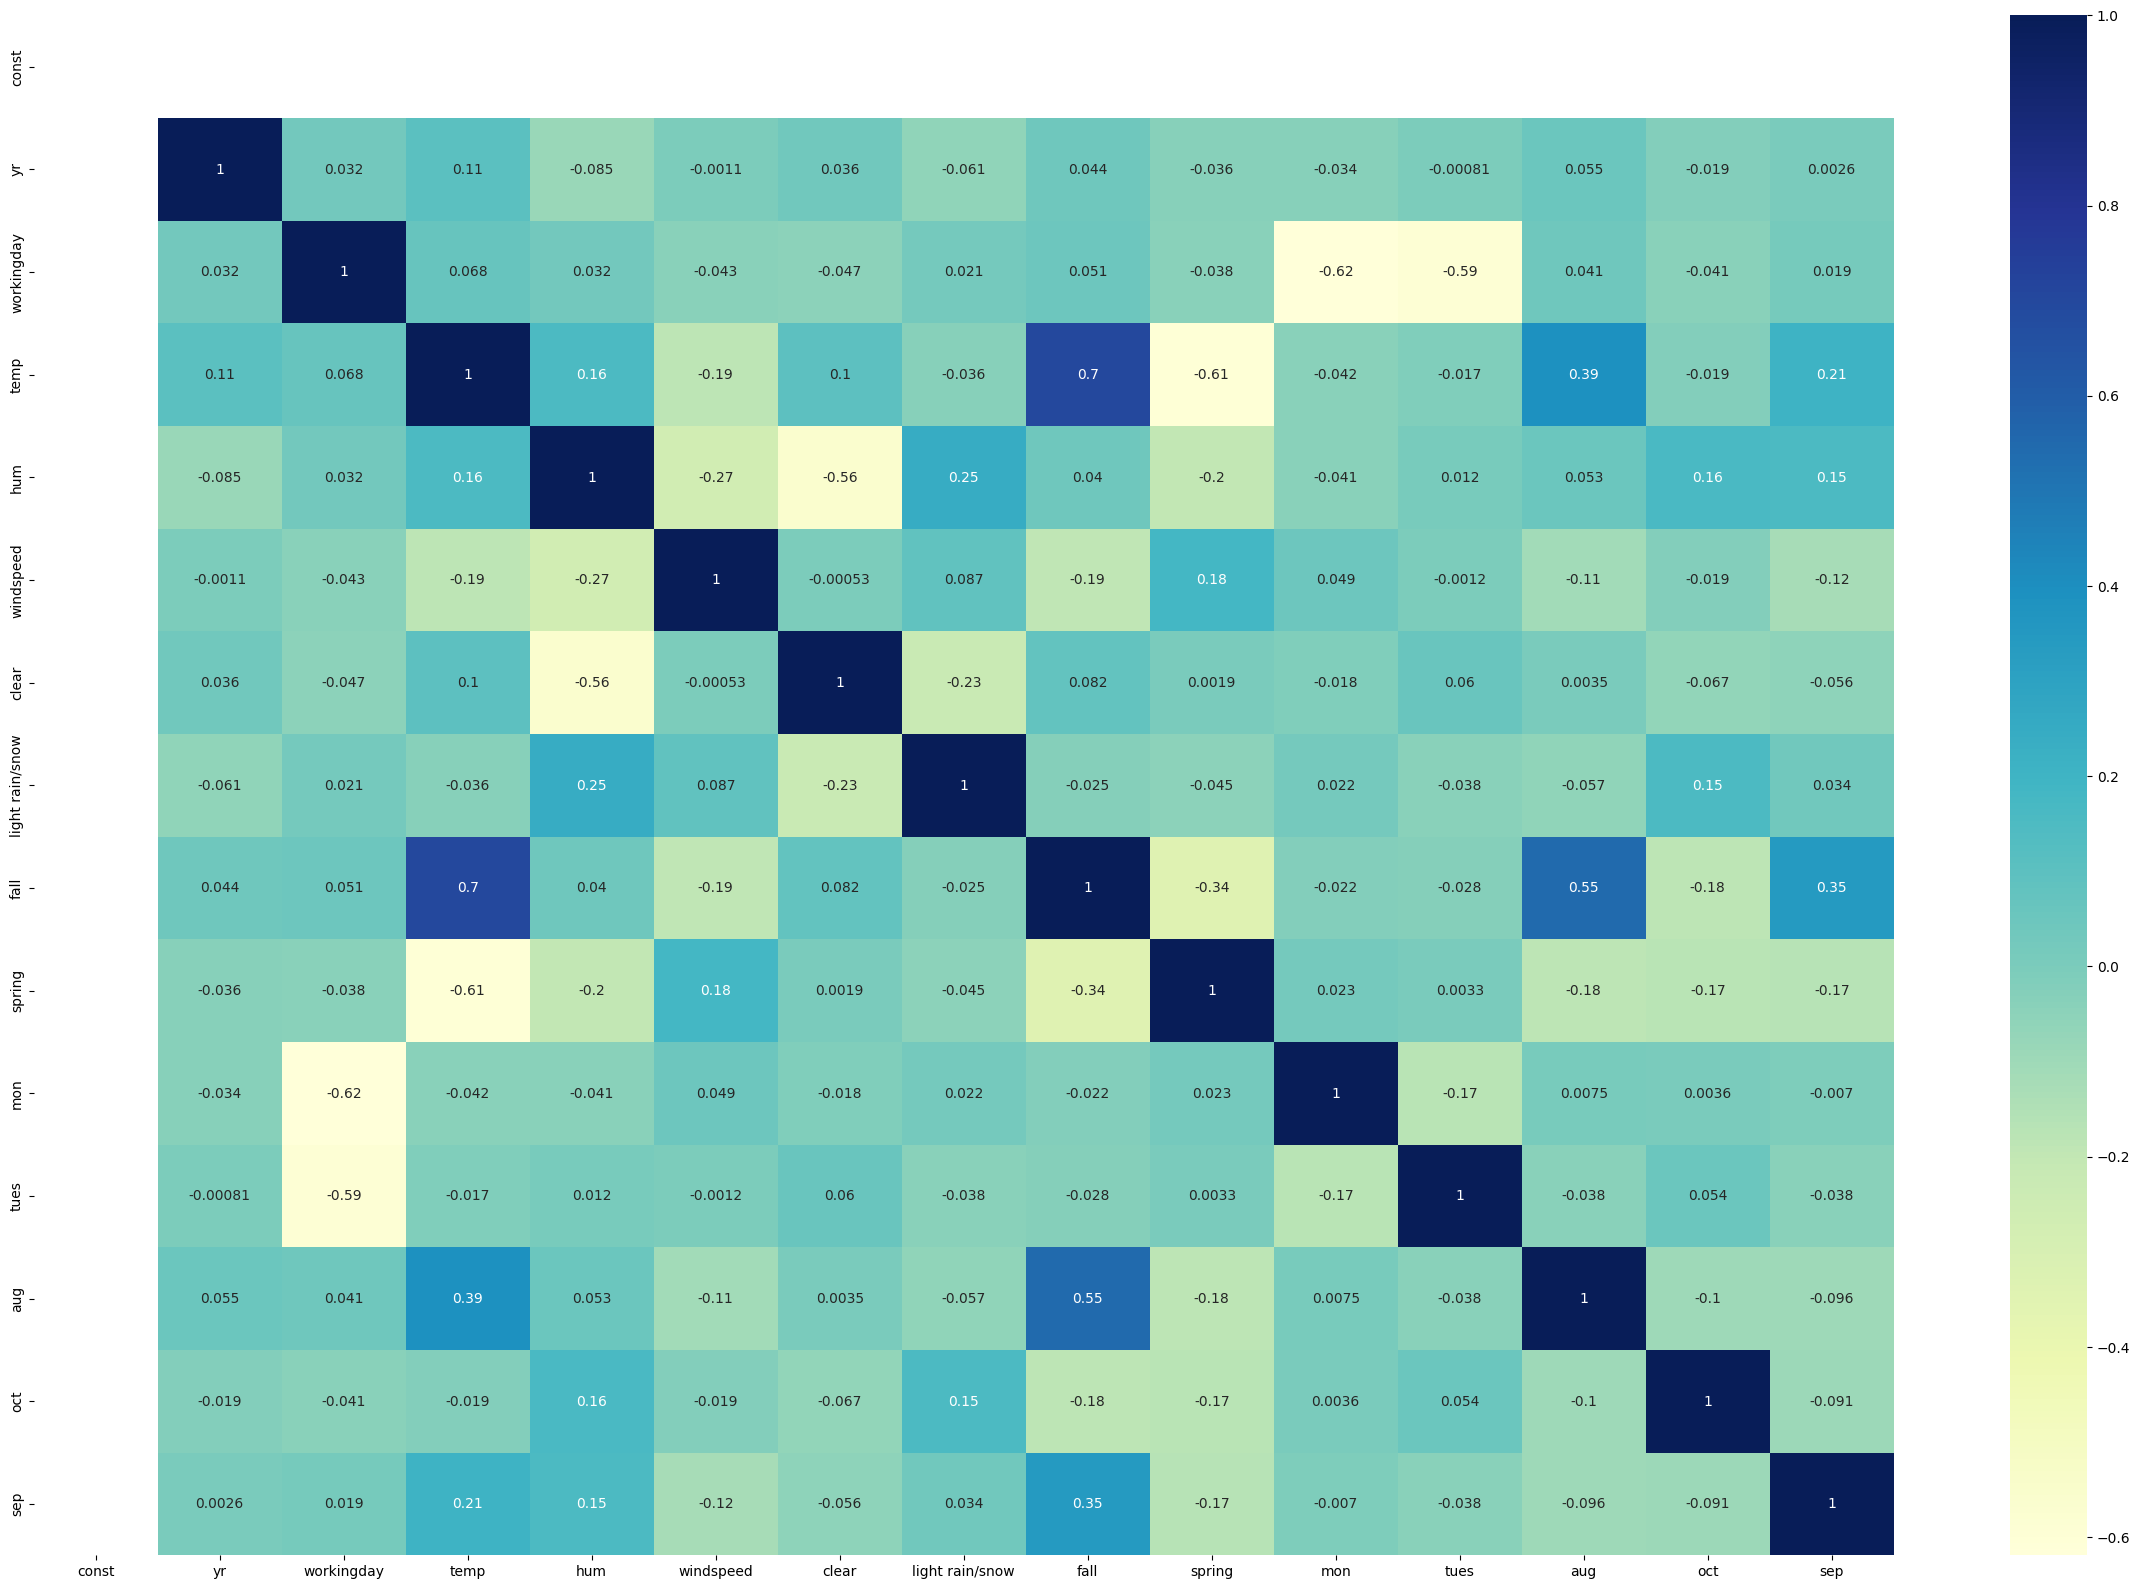

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.8
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          6.52e-192
Time:                        23:32:20   Log-Likelihood:                 518.43
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     495   BIC:                            -943.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2198      0.042     

In [45]:
X_train_sm_7 = remove_variable(X_train_sm_6,'summer')
lm_7 = build_ols_model(X_train_sm_7,y_train)

### Removing 'tues' column as it is having high p-value & Building a 8th model

           Features    VIF
2              temp  19.00
3               hum  13.89
1        workingday   4.66
4         windspeed   4.29
7              fall   4.25
5             clear   2.94
8            spring   2.07
0                yr   2.05
10              aug   1.86
9               mon   1.82
12              sep   1.50
11              oct   1.26
6   light rain/snow   1.16


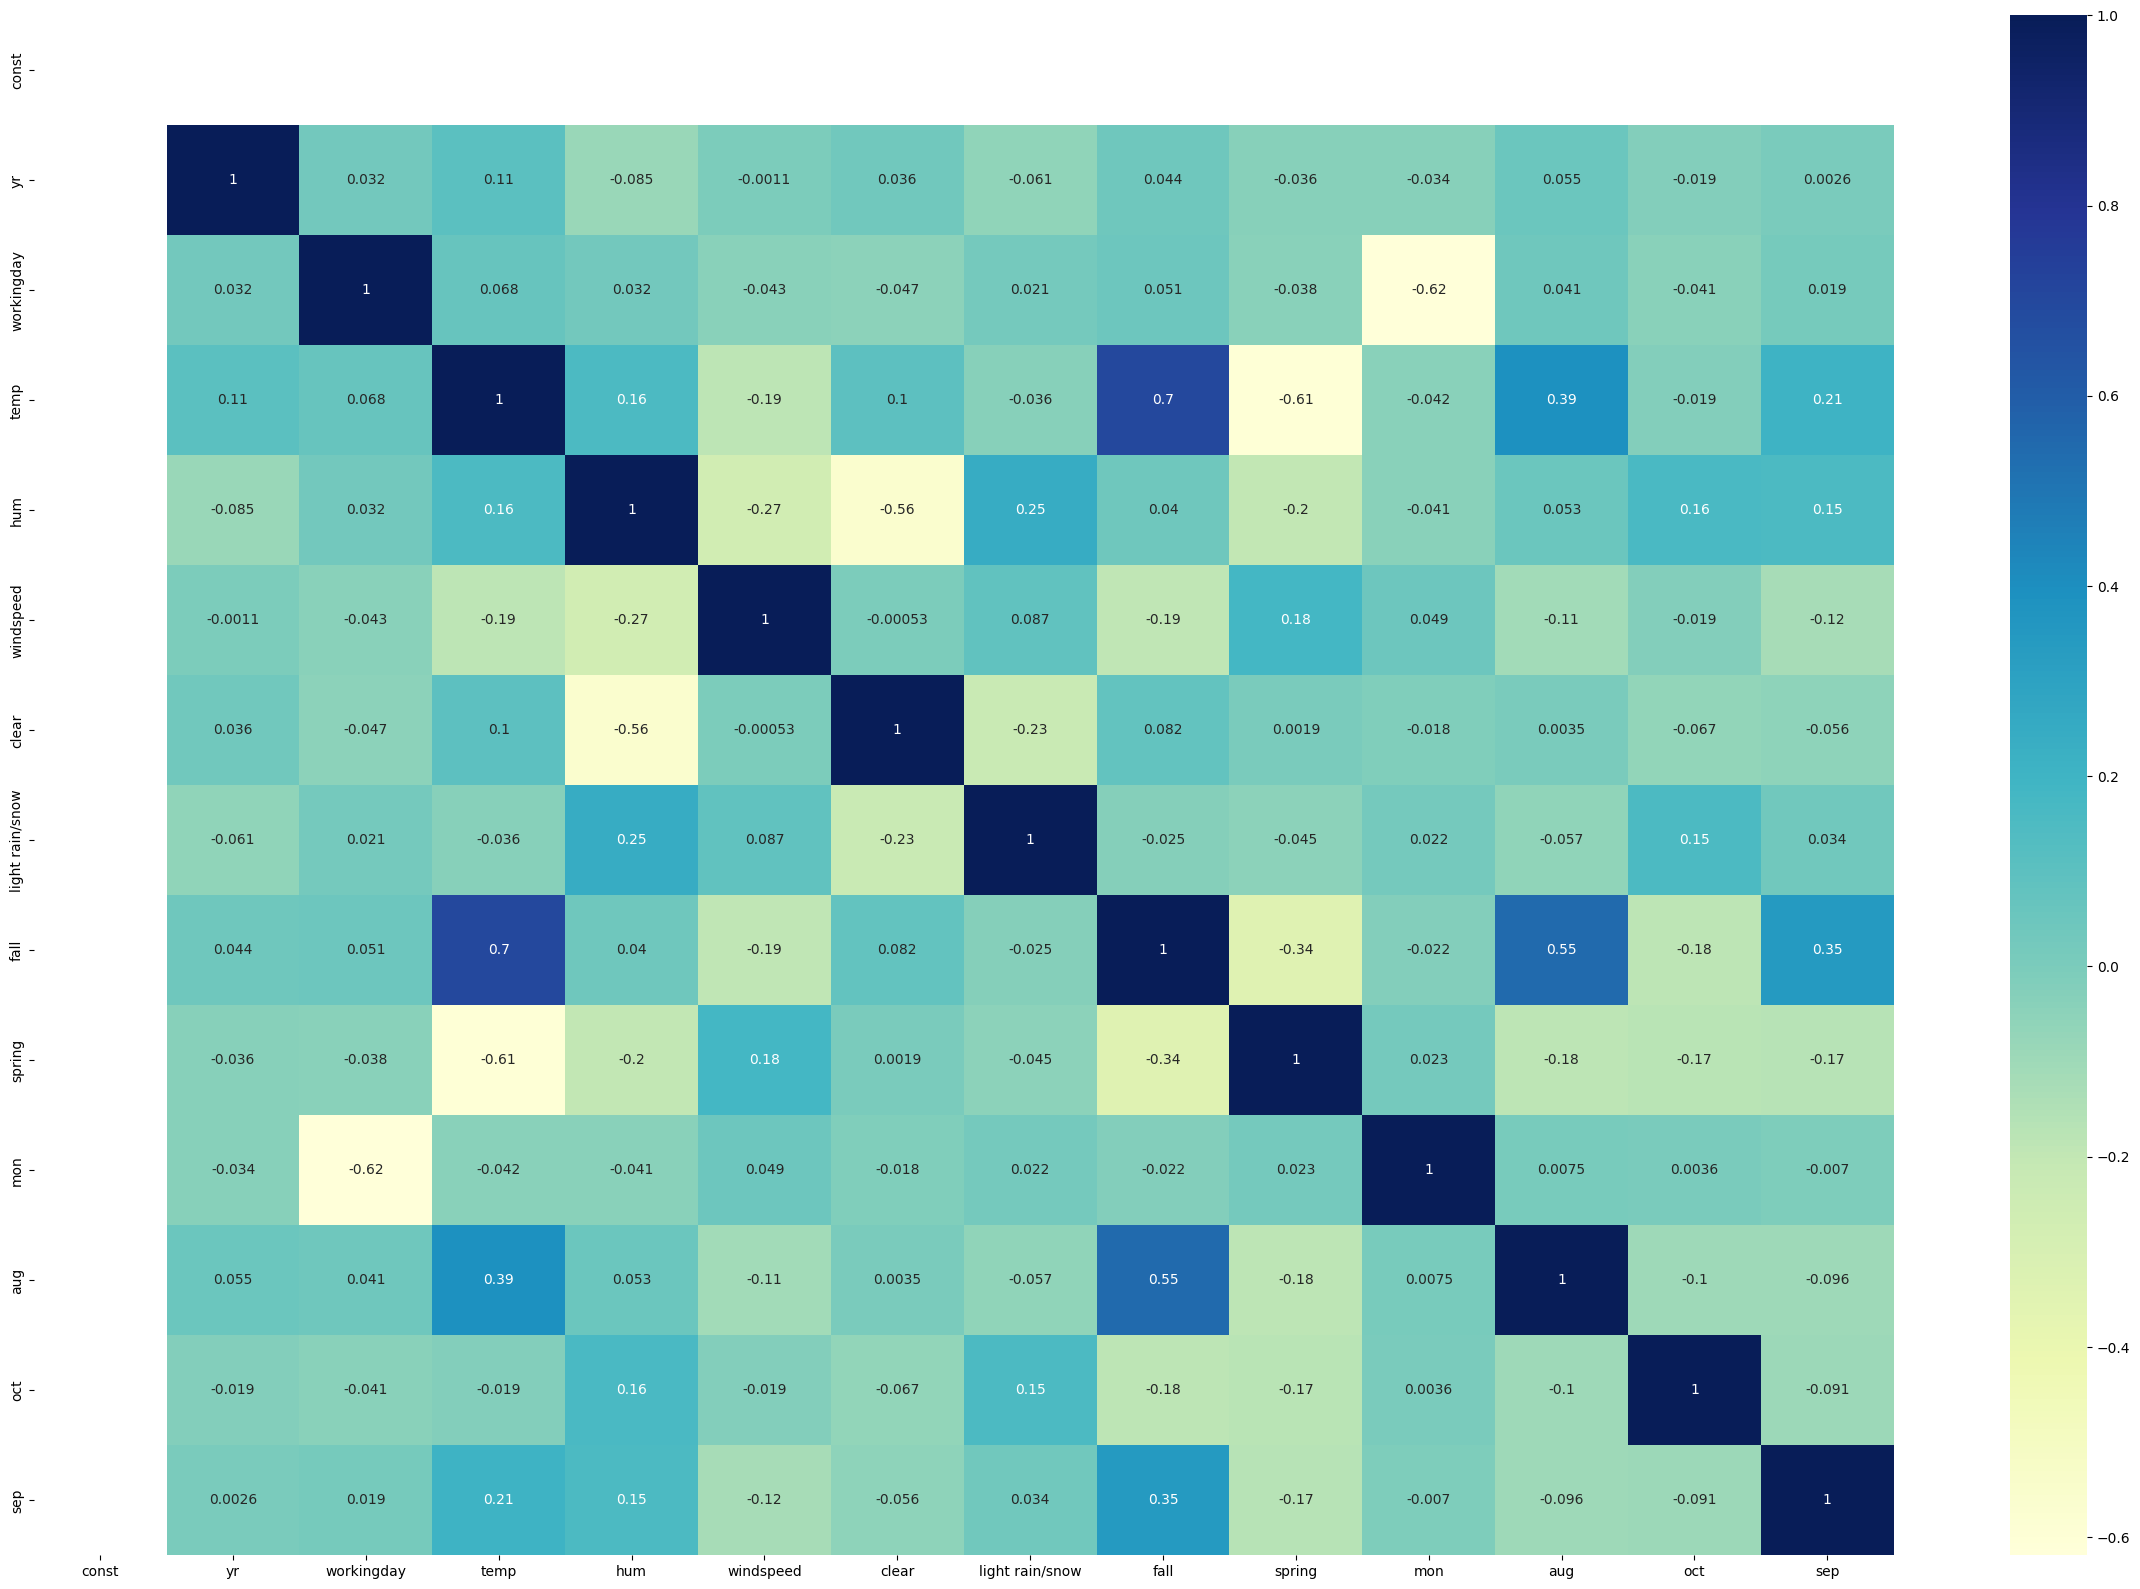

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     210.5
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          2.78e-192
Time:                        23:32:22   Log-Likelihood:                 516.53
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     496   BIC:                            -945.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2630      0.035     

In [46]:
X_train_sm_8 = remove_variable(X_train_sm_7,'tues')
lm_8 = build_ols_model(X_train_sm_8,y_train)

##### The p-values now are in the acceptable range of 5%. Will now remove the high VIF variables one by one

### Removing 'temp' column as it is having high VIF and also as seen from the heatmap has high correlation with fall and spring & Building a 9th model

           Features   VIF
2               hum  7.34
1        workingday  4.59
3         windspeed  4.14
6              fall  2.78
4             clear  2.50
0                yr  1.99
9               aug  1.85
8               mon  1.81
7            spring  1.58
11              sep  1.48
10              oct  1.26
5   light rain/snow  1.14


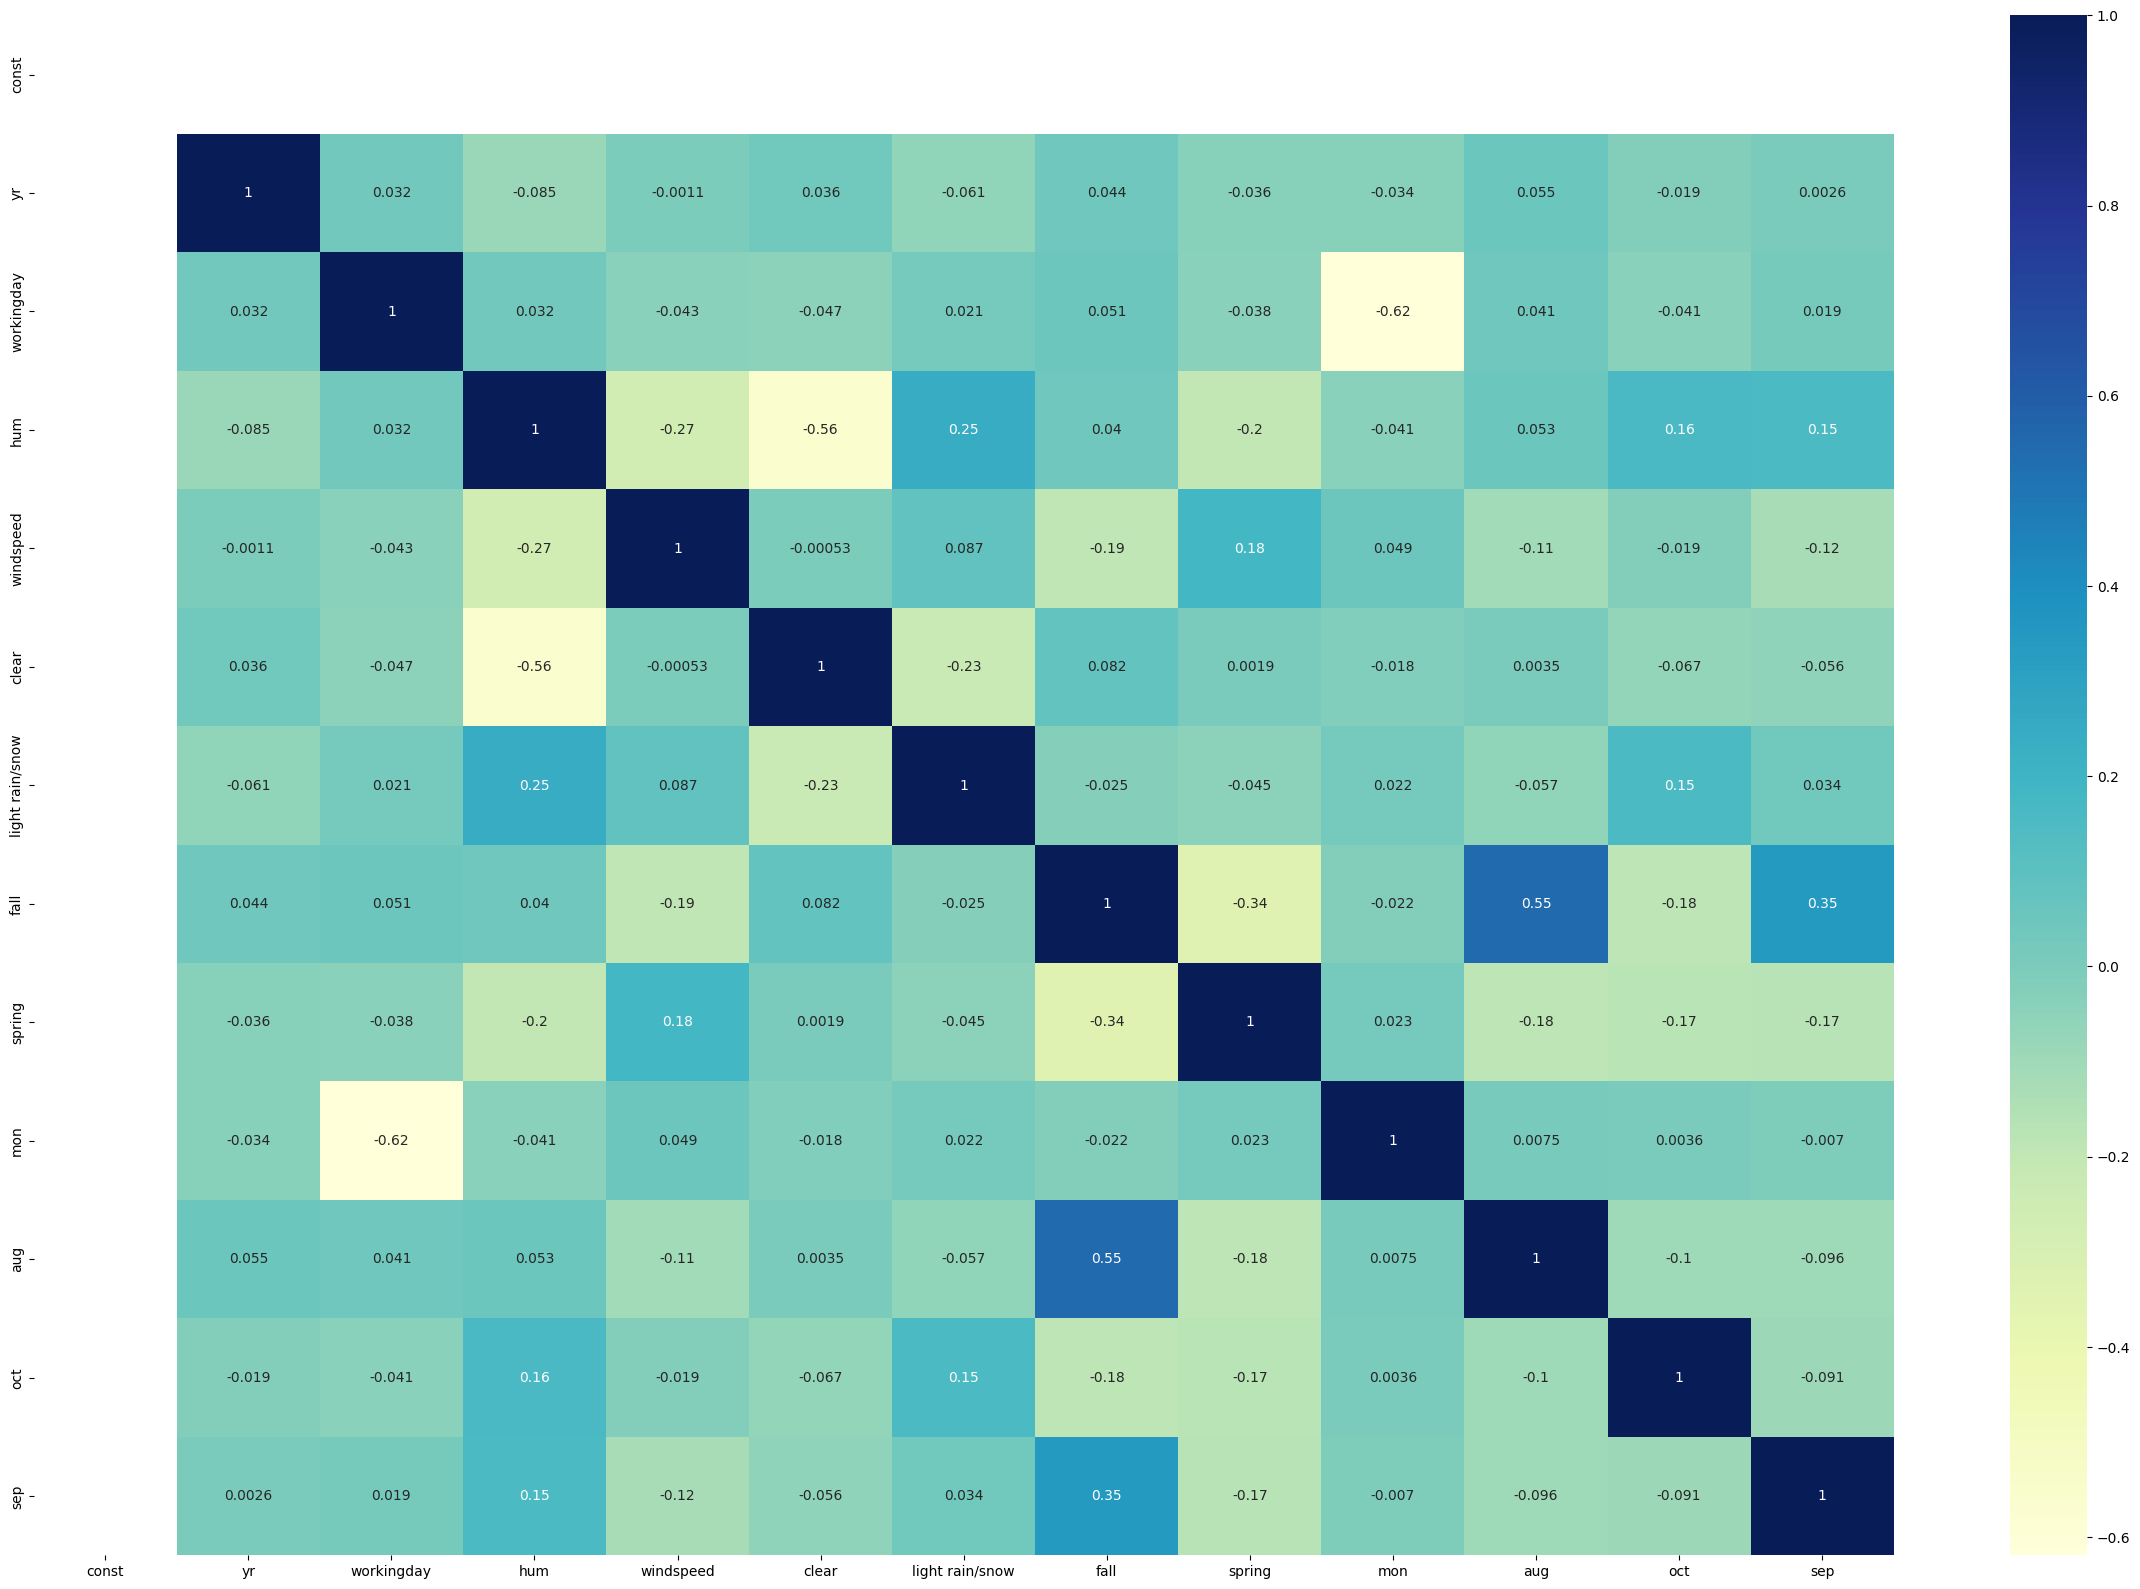

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     140.2
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          6.53e-151
Time:                        23:32:23   Log-Likelihood:                 415.50
No. Observations:                 510   AIC:                            -805.0
Df Residuals:                     497   BIC:                            -749.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3906      0.042     

In [47]:
X_train_sm_9 = remove_variable(X_train_sm_8,'temp')
lm_9 = build_ols_model(X_train_sm_9,y_train)

### Removing 'hum' column as it is having high p-value & high VIF & Building a 10th model

           Features   VIF
2         windspeed  3.64
1        workingday  3.24
5              fall  2.73
3             clear  2.50
0                yr  1.92
8               aug  1.84
6            spring  1.55
7               mon  1.54
10              sep  1.44
9               oct  1.18
4   light rain/snow  1.13


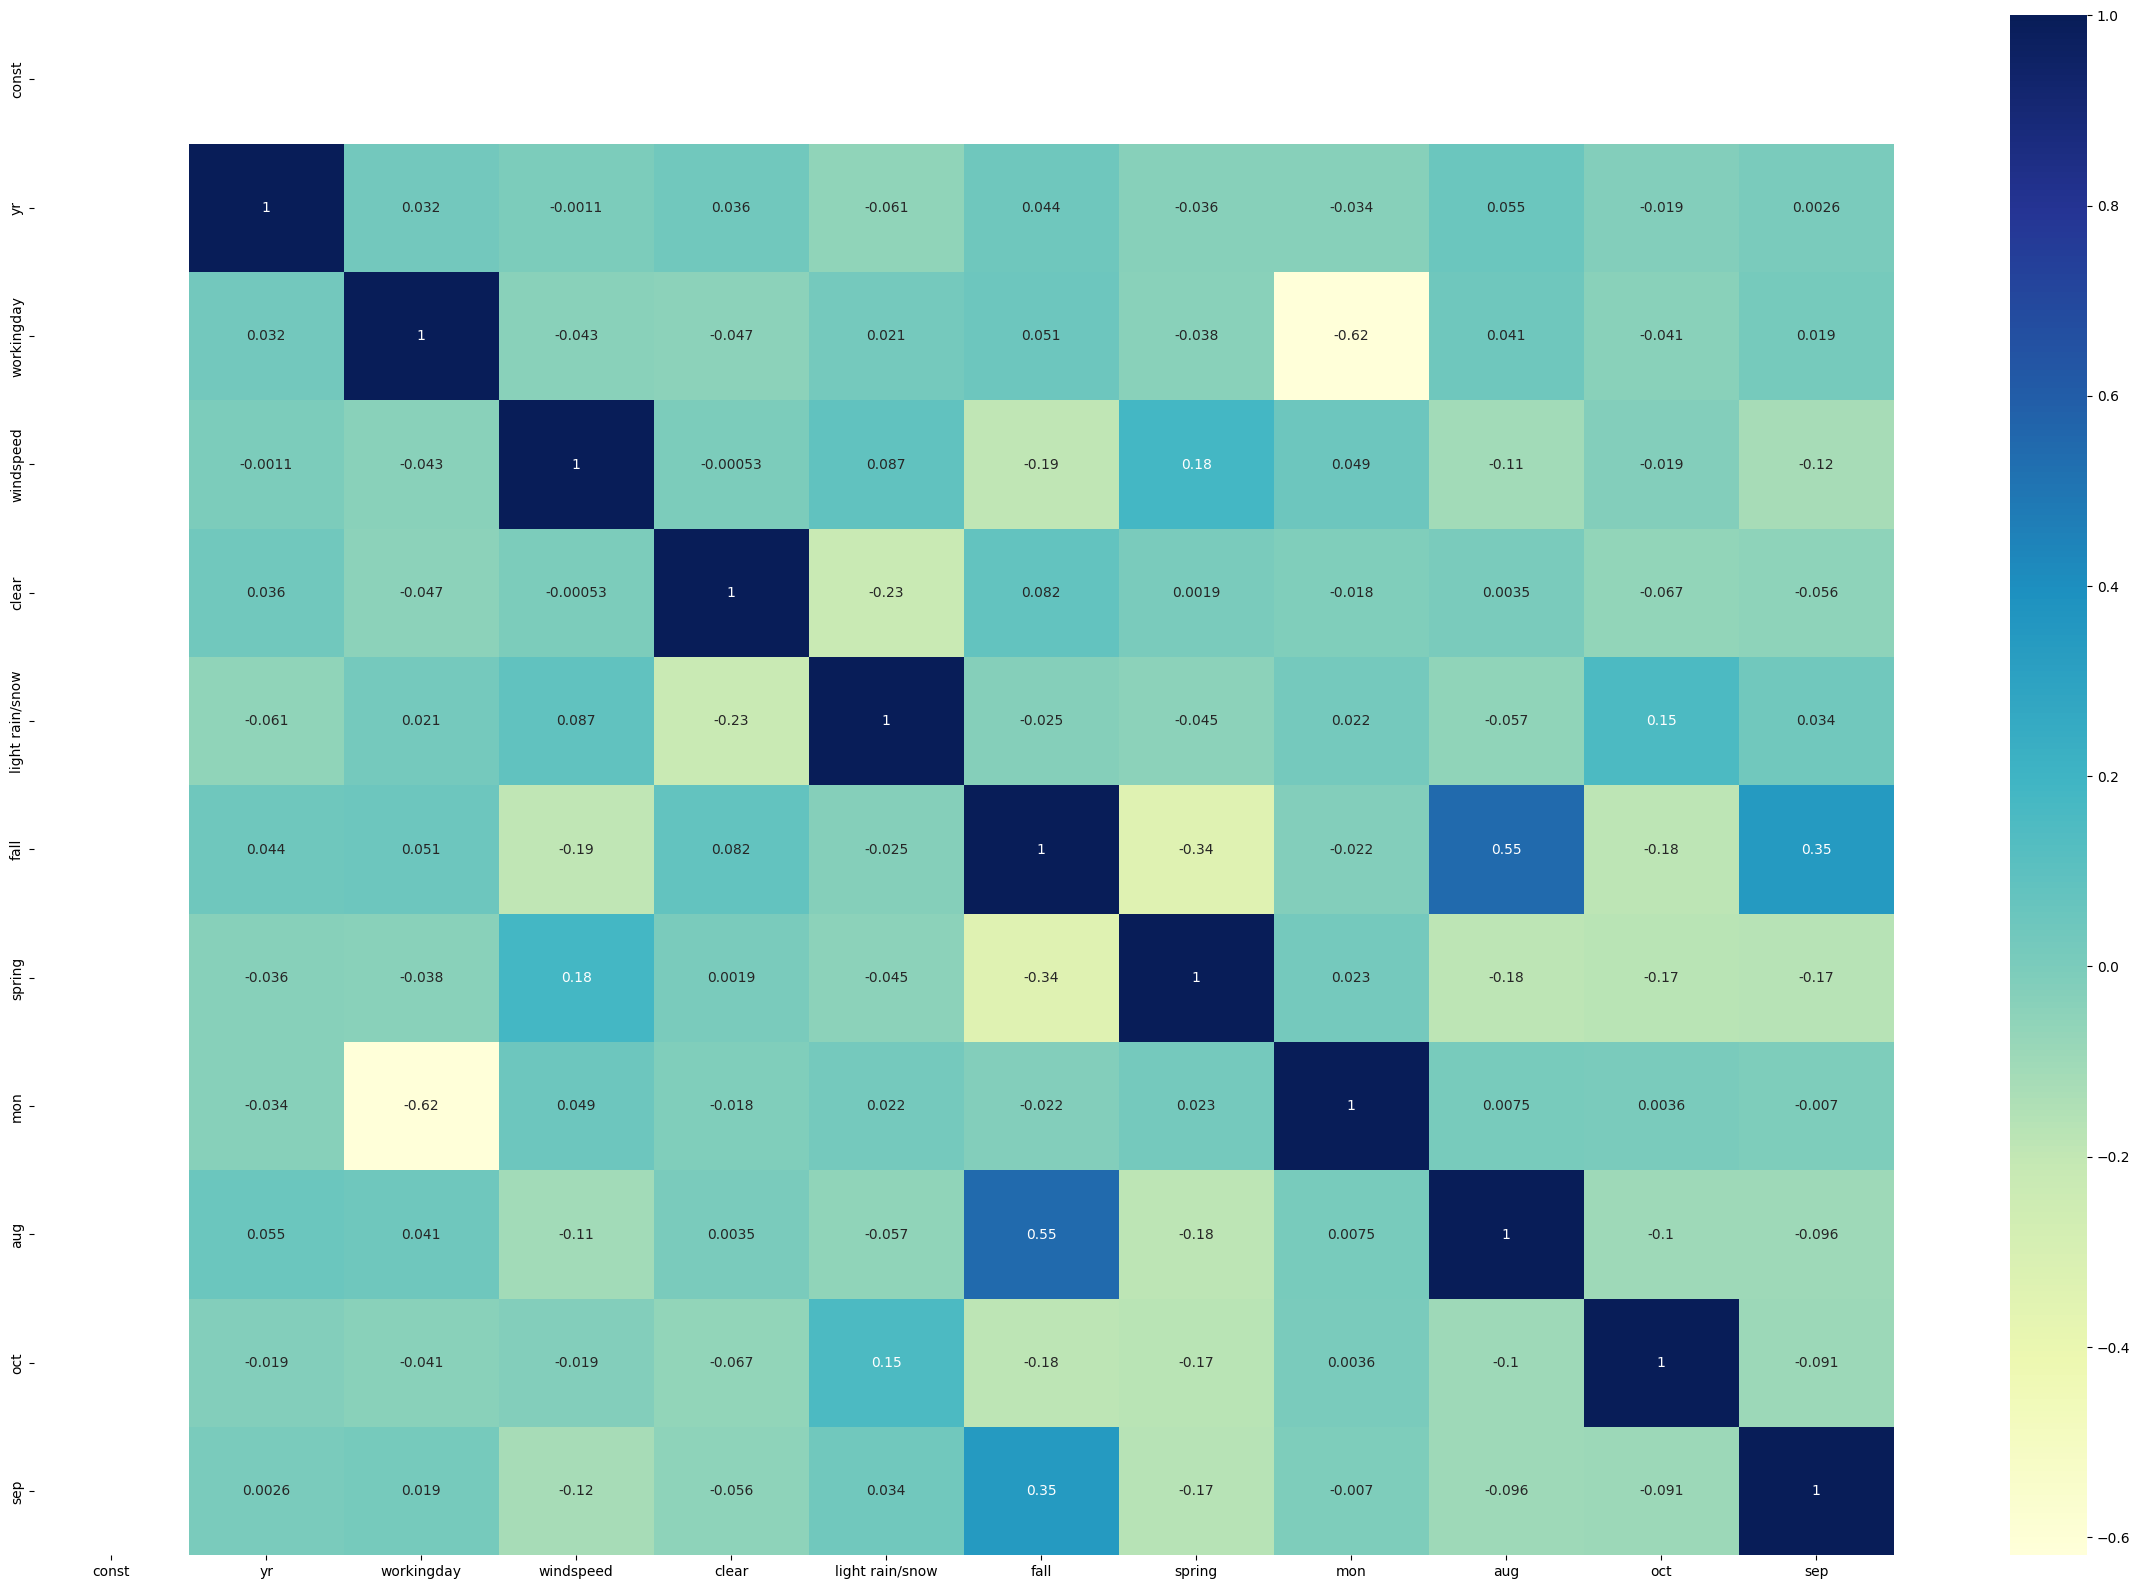

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     153.0
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          6.91e-152
Time:                        23:32:24   Log-Likelihood:                 415.19
No. Observations:                 510   AIC:                            -806.4
Df Residuals:                     498   BIC:                            -755.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3619      0.018     

In [48]:
X_train_sm_10 = remove_variable(X_train_sm_9,'hum')
lm_10 = build_ols_model(X_train_sm_10,y_train)

### Removing 'aug' column as it is having high p-value & Building a 11th model

          Features   VIF
2        windspeed  3.64
1       workingday  3.22
3            clear  2.48
0               yr  1.92
5             fall  1.75
6           spring  1.55
7              mon  1.53
9              sep  1.24
8              oct  1.18
4  light rain/snow  1.12


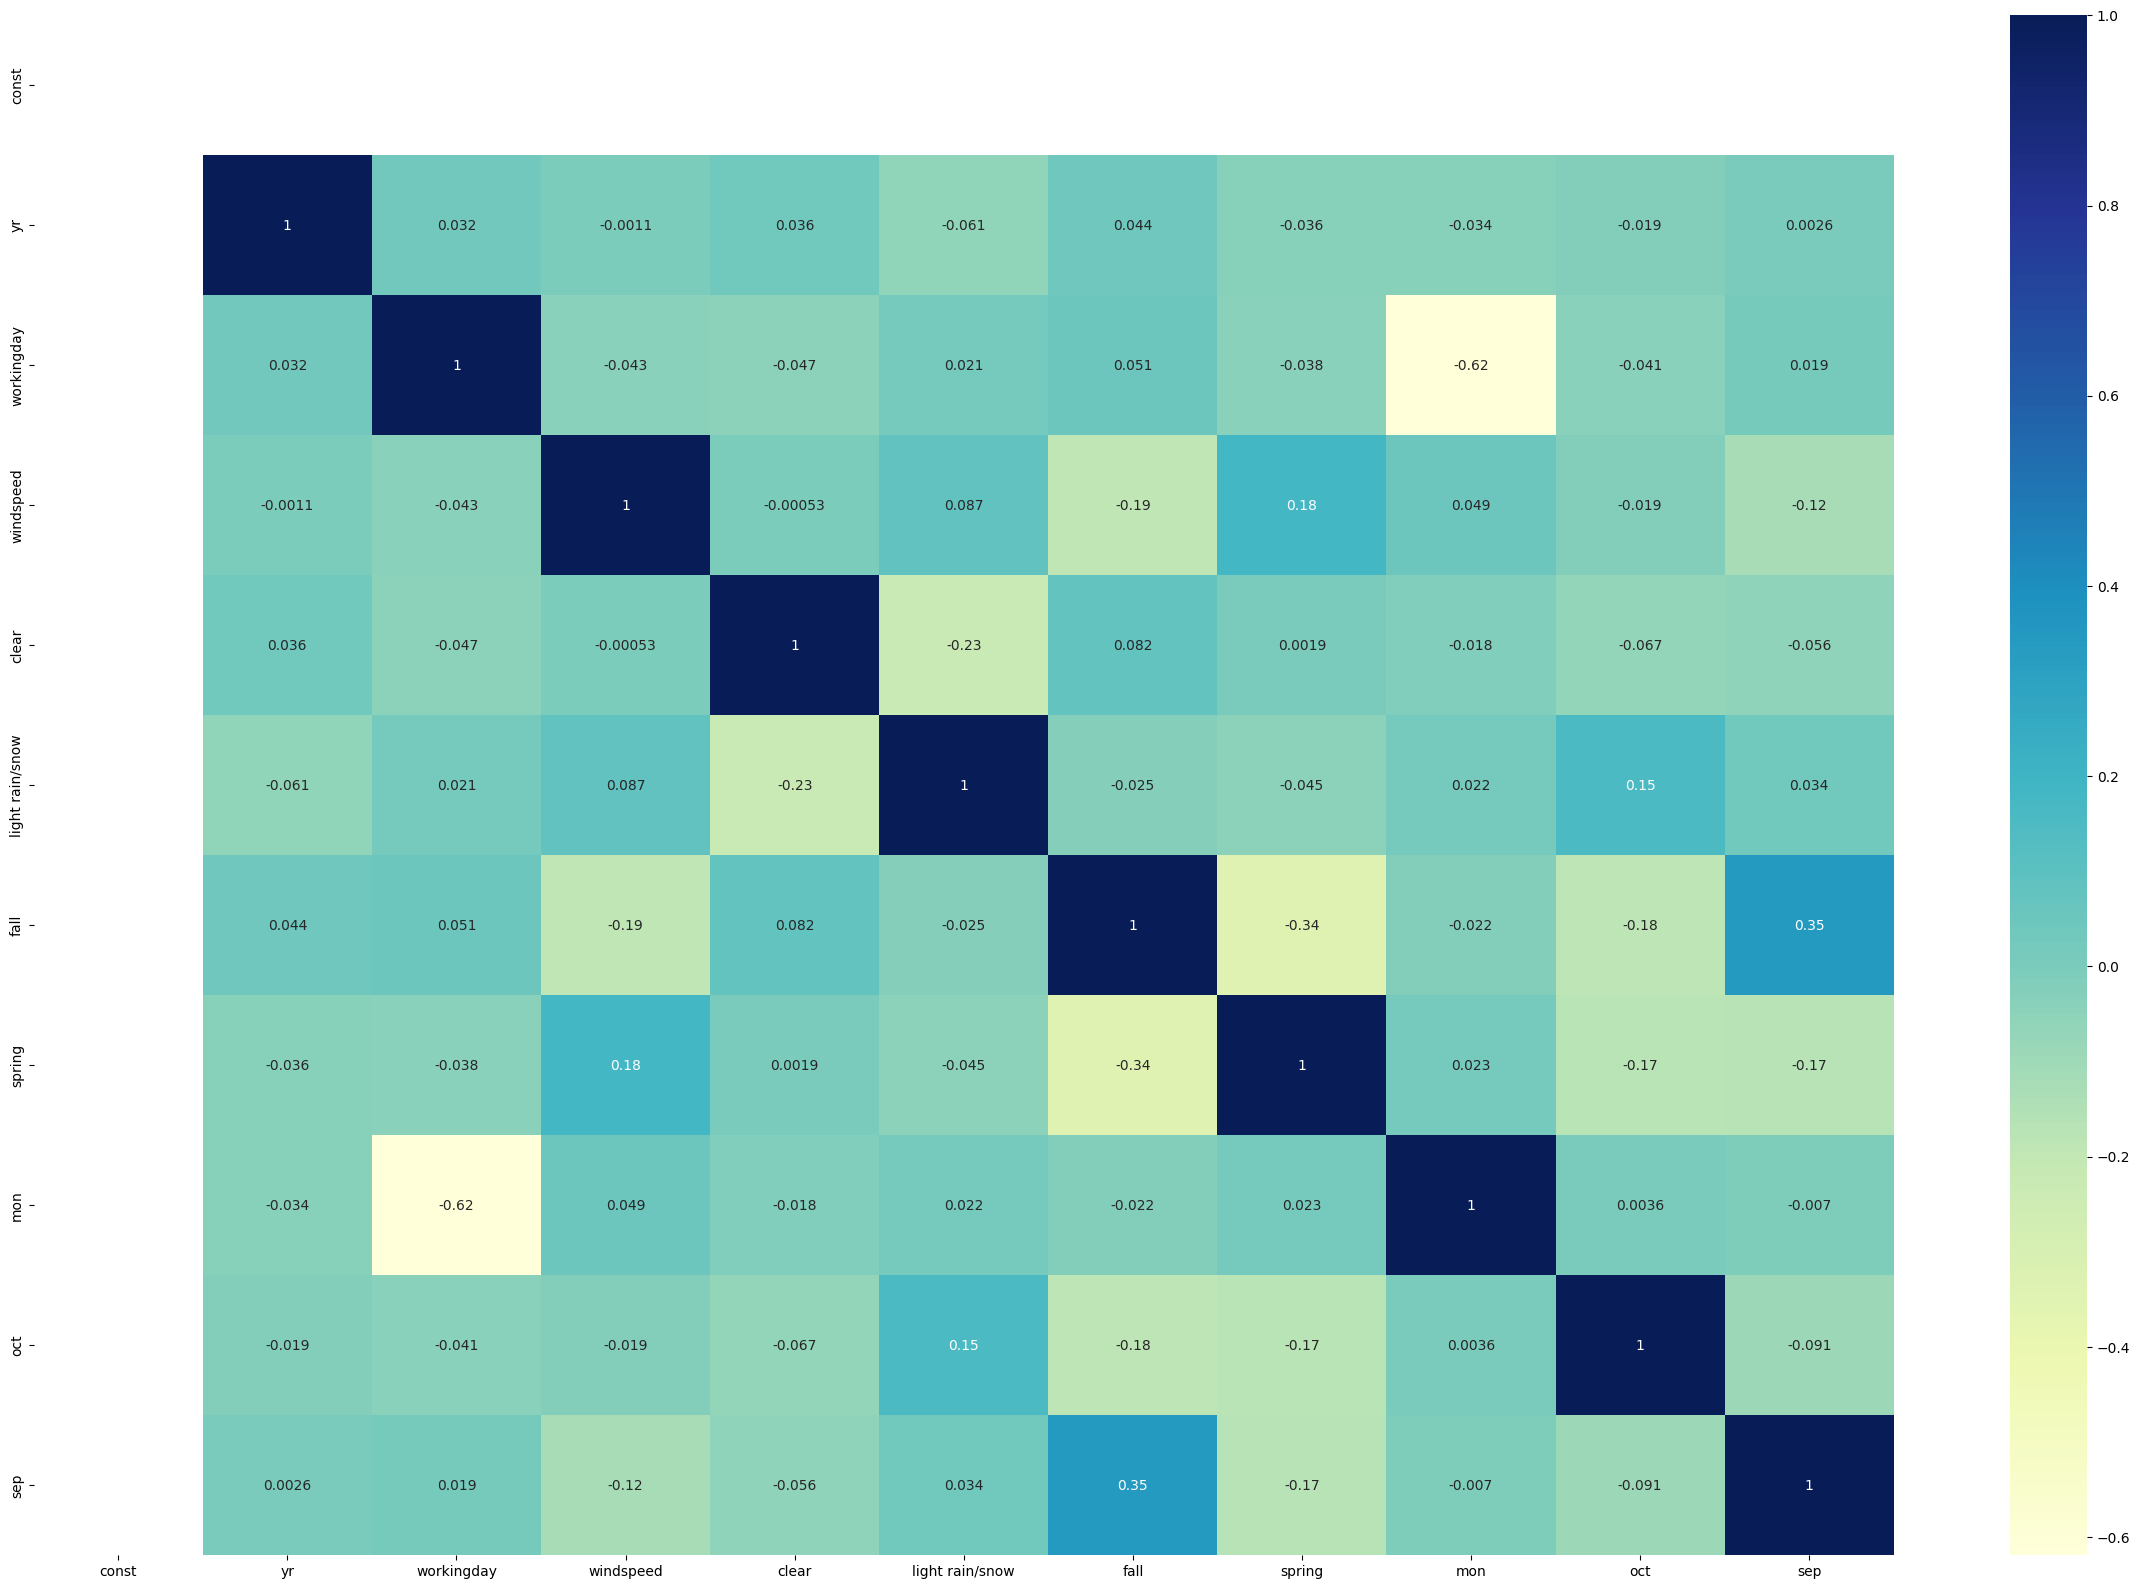

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     167.4
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          2.32e-152
Time:                        23:32:25   Log-Likelihood:                 413.65
No. Observations:                 510   AIC:                            -805.3
Df Residuals:                     499   BIC:                            -758.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3630      0.018     

In [49]:
X_train_sm_11 = remove_variable(X_train_sm_10,'aug')
lm_11 = build_ols_model(X_train_sm_11,y_train)

#### The VIFs of all the variables are now in the acceptable range of <5 and the p-values are also lower <5%
#### Will stop eliminating variables. This is our final model

### Predicting the y values of the training data

In [50]:
y_train_pred = lm_11.predict(X_train_sm_11)

## Residual Analysis

### Calculating the residuals

In [51]:
res = y_train - y_train_pred

### Plotting the error terms

Text(0.5, 0, 'Errors')

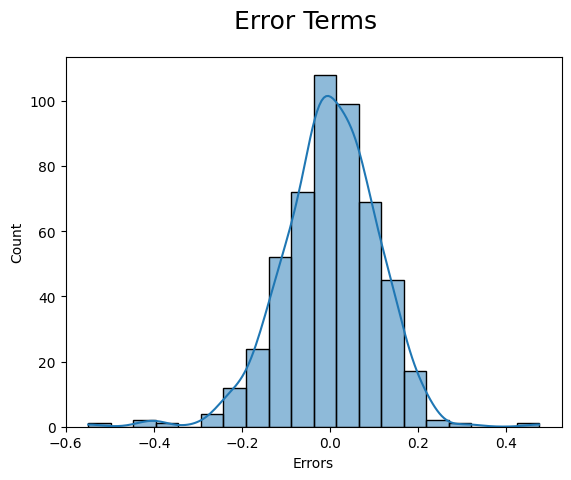

In [52]:
fig = plt.figure()
sns.histplot(res, bins = 20, kde=True)
fig.suptitle('Error Terms', fontsize = 18)
plt.xlabel('Errors', fontsize = 10)

### Homoscedasticity

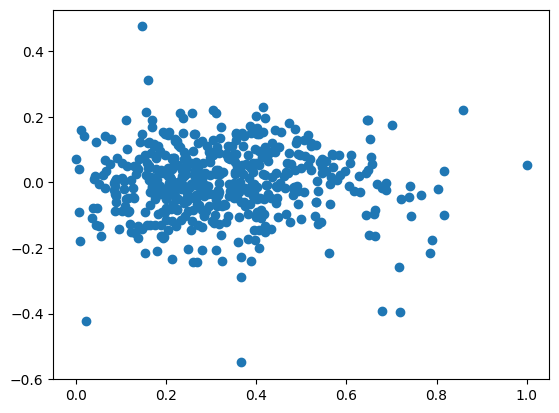

In [53]:
plt.scatter(X_train_sm_11['windspeed'],res)
plt.show()

### Getting the Mean Squared and Root Mean Squared Value

In [54]:
mse = mean_squared_error(y_train, y_train_pred)
print("MSE - ",mse)
print("RMSE - ",np.sqrt(mse))

MSE -  0.011561845365061212
RMSE -  0.10752602180431121


## Prediction with Test Data

### Transforming the numerical variables of testing data with MinMaxScaler

In [55]:
records_test[num_variables] = scaler.transform(records_test[num_variables])

### Getting X & y variables for test data

In [56]:
y_test = records_test.pop('cnt')
X_test = records_test

### Adding constant column and removing all the eliminated columns from the test data

In [57]:
X_test_sm = sm.add_constant(X_test)
X_test_sm = X_test_sm[X_train_sm_11.columns]

### Predicting the y values of test data

In [58]:
y_pred = lm_11.predict(X_test_sm)

### Plotting y_test and y_pred to understand the spread

Text(0, 0.5, 'y_pred')

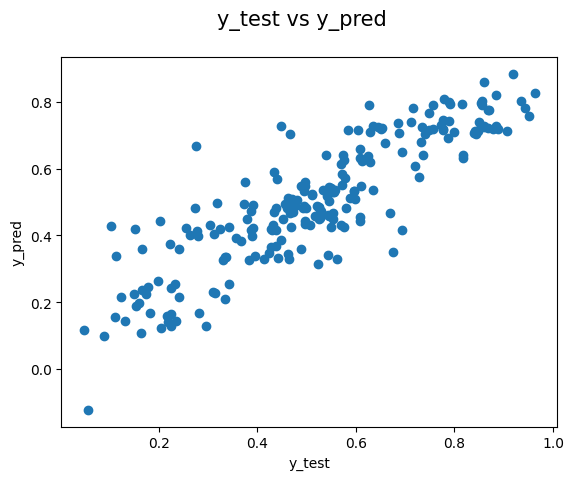

In [59]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=15)
plt.xlabel('y_test', fontsize=10)
plt.ylabel('y_pred', fontsize=10)

### Getting the r2 score for test data

In [60]:
r2 = r2_score(y_test, y_pred)
print(r2)

0.7563016448950657


### Getting params of the model

In [62]:
lm_11.params

const              0.362954
yr                 0.247952
workingday         0.060994
windspeed         -0.159172
clear              0.092730
light rain/snow   -0.229837
fall               0.067970
spring            -0.230199
mon                0.066727
oct                0.059285
sep                0.071884
dtype: float64

## Conclusion

 - The r2 score of training data set is 77% and for testing data is 75.1% which is not bad
 - The linear equation can be given by :  `cnt = 0.3629 +  0.248 * yr + 0.061 * workingday - 0.159 * windspeed + 0.093 * clear - 0.230 * light rain/snow + 0.068 * fall - 0.230 * spring + 0.067 * mon + 0.059 * oct + 0.072 * sep`